In [1]:
# !pip uninstall -y keras ml-dtypes
!pip install keras==2.15.0 ml-dtypes==0.2.0

In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


# Validation Image Processing

In [3]:
validation_set = training_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [9]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [10]:
for x, y in training_set:
    print(x, x.shape)
    print(y, y.shape)

tf.Tensor(
[[[[ 55.5   47.5   45.5 ]
   [ 75.75  67.75  65.75]
   [ 98.25  88.25  86.25]
   ...
   [197.5  192.5  188.5 ]
   [201.5  196.5  192.5 ]
   [183.   178.   174.  ]]

  [[ 78.    70.    68.  ]
   [ 97.5   87.5   86.5 ]
   [110.25 100.25  98.25]
   ...
   [193.5  188.5  184.5 ]
   [195.   190.   186.  ]
   [204.5  199.5  195.5 ]]

  [[109.    99.    97.  ]
   [110.5  100.5   98.5 ]
   [127.25 116.25 114.25]
   ...
   [185.75 180.75 176.75]
   [201.5  196.5  192.5 ]
   [194.   189.   185.  ]]

  ...

  [[152.75 141.75 135.75]
   [149.25 138.25 132.25]
   [136.25 125.25 119.25]
   ...
   [177.5  172.5  168.5 ]
   [176.75 171.75 167.75]
   [174.5  169.5  165.5 ]]

  [[153.   142.   136.  ]
   [151.   140.   134.  ]
   [138.25 127.25 121.25]
   ...
   [182.75 177.75 173.75]
   [174.5  169.5  165.5 ]
   [173.25 168.25 164.25]]

  [[153.75 142.75 136.75]
   [152.   141.   135.  ]
   [141.25 130.25 124.25]
   ...
   [176.   171.   167.  ]
   [174.   169.   165.  ]
   [176.   171.   16

tf.Tensor(
[[[[171.75 208.75 103.75]
   [163.75 200.75  96.25]
   [157.25 193.25  93.25]
   ...
   [154.5  190.5   92.  ]
   [168.   201.5  109.  ]
   [137.25 170.25  82.25]]

  [[180.5  217.   115.5 ]
   [169.5  205.75 106.  ]
   [170.75 206.75 109.25]
   ...
   [154.75 191.5   88.75]
   [163.25 197.5  101.  ]
   [157.75 191.5   97.75]]

  [[189.25 223.25 127.75]
   [178.25 212.   118.25]
   [179.75 213.25 121.25]
   ...
   [162.25 200.    91.75]
   [163.5  198.75  94.75]
   [174.25 209.25 107.25]]

  ...

  [[187.5  214.5  119.5 ]
   [187.   214.   119.  ]
   [183.25 212.25 119.25]
   ...
   [179.75 211.75 146.75]
   [182.   213.25 152.5 ]
   [183.5  214.5  155.5 ]]

  [[193.75 218.75 126.75]
   [190.75 217.75 124.75]
   [187.75 213.75 122.75]
   ...
   [183.   215.25 148.25]
   [176.75 208.75 145.25]
   [177.   208.   148.  ]]

  [[197.25 222.25 131.25]
   [192.25 217.25 126.25]
   [188.75 214.75 125.75]
   ...
   [184.75 217.5  149.  ]
   [176.25 208.25 143.75]
   [175.   206.   14

tf.Tensor(
[[[[137.5  138.5  130.5 ]
   [136.25 137.25 129.25]
   [137.5  138.5  130.5 ]
   ...
   [132.5  136.5  137.5 ]
   [132.5  136.5  137.5 ]
   [132.5  136.5  137.5 ]]

  [[140.   141.   133.  ]
   [137.   138.   130.  ]
   [138.   139.   131.  ]
   ...
   [131.5  135.5  136.5 ]
   [131.5  135.5  136.5 ]
   [131.5  135.5  136.5 ]]

  [[139.5  140.5  132.5 ]
   [137.75 138.75 130.75]
   [138.75 139.75 131.75]
   ...
   [129.5  133.5  134.5 ]
   [129.5  133.5  134.5 ]
   [129.5  133.5  134.5 ]]

  ...

  [[ 82.25  82.25  74.25]
   [ 83.75  83.75  75.75]
   [ 83.5   83.5   75.5 ]
   ...
   [106.25 106.25 106.25]
   [109.   109.   109.  ]
   [114.   114.   114.  ]]

  [[ 81.    81.    73.  ]
   [ 83.    83.    75.  ]
   [ 83.5   83.5   75.5 ]
   ...
   [112.5  112.5  112.5 ]
   [111.25 111.25 111.25]
   [113.5  113.5  113.5 ]]

  [[ 79.    79.    71.  ]
   [ 77.75  77.75  69.75]
   [ 79.25  79.25  71.25]
   ...
   [116.   116.   116.  ]
   [115.5  115.5  115.5 ]
   [107.   107.   10

tf.Tensor(
[[[[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  ...

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   25

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[191.25 186.25 182.25]
   [174.25 169.25 165.25]
   [186.   181.   177.  ]
   ...
   [145.25 132.25 126.25]
   [156.   143.   137.  ]
   [140.   127.   121.  ]]

  [[172.   167.   163.  ]
   [191.5  186.5  182.5 ]
   [183.75 178.75 174.75]
   ...
   [145.   132.   126.  ]
   [143.5  130.5  124.5 ]
   [147.25 134.25 128.25]]

  [[189.   184.   180.  ]
   [188.5  183.5  179.5 ]
   [183.75 178.75 174.75]
   ...
   [137.75 124.75 118.75]
   [153.5  140.5  134.5 ]
   [144.   131.   125.  ]]

  ...

  [[184.   179.   176.  ]
   [168.5  163.5  160.5 ]
   [168.5  163.5  160.5 ]
   ...
   [144.25 126.25 116.25]
   [155.5  137.5  127.5 ]
   [149.75 131.75 121.75]]

  [[176.75 171.75 168.75]
   [180.25 175.25 172.25]
   [175.25 170.25 167.25]
   ...
   [161.75 143.75 133.75]
   

tf.Tensor(
[[[[110.75 107.75 128.75]
   [110.75 107.75 128.75]
   [104.25 101.25 122.25]
   ...
   [ 88.25  84.25  99.25]
   [ 83.5   79.5   94.5 ]
   [ 84.5   80.5   95.5 ]]

  [[113.25 110.25 131.25]
   [107.   104.   125.  ]
   [101.75  98.75 119.75]
   ...
   [ 97.25  93.25 108.25]
   [ 92.5   88.5  103.5 ]
   [ 97.    93.   108.  ]]

  [[110.   107.   128.  ]
   [101.    98.   119.  ]
   [100.75  97.75 118.75]
   ...
   [ 92.75  88.75 103.75]
   [ 95.    91.   106.  ]
   [ 82.25  78.25  93.25]]

  ...

  [[145.5  138.5  146.5 ]
   [143.75 136.75 144.75]
   [143.5  136.5  144.5 ]
   ...
   [122.75 115.75 122.75]
   [121.   114.   121.  ]
   [115.75 108.75 115.75]]

  [[150.5  143.5  151.5 ]
   [149.   142.   150.  ]
   [147.5  140.5  148.5 ]
   ...
   [123.25 116.25 123.25]
   [134.   127.   134.  ]
   [126.5  119.5  126.5 ]]

  [[149.5  142.5  150.5 ]
   [147.25 140.25 148.25]
   [145.25 138.25 146.25]
   ...
   [113.   106.   113.  ]
   [118.75 111.75 118.75]
   [110.75 103.75 11

tf.Tensor(
[[[[189.   185.   186.  ]
   [186.5  182.5  183.5 ]
   [187.25 183.25 184.25]
   ...
   [209.5  207.5  210.5 ]
   [208.25 206.25 209.25]
   [206.75 204.75 207.75]]

  [[185.5  181.5  182.5 ]
   [186.   182.   183.  ]
   [180.25 176.25 177.25]
   ...
   [204.25 202.25 205.25]
   [204.75 202.75 205.75]
   [208.25 206.25 209.25]]

  [[188.   184.   185.  ]
   [187.5  183.5  184.5 ]
   [184.25 180.25 181.25]
   ...
   [209.75 207.75 210.75]
   [210.   208.   211.  ]
   [208.25 206.25 209.25]]

  ...

  [[111.5  105.5  109.5 ]
   [117.5  111.5  115.5 ]
   [109.5  103.5  107.5 ]
   ...
   [115.25 109.25 113.25]
   [121.75 115.75 119.75]
   [119.25 113.25 117.25]]

  [[116.25 110.25 114.25]
   [112.   106.   110.  ]
   [105.    99.   103.  ]
   ...
   [122.5  116.5  120.5 ]
   [127.5  121.5  125.5 ]
   [117.25 111.25 115.25]]

  [[111.75 105.75 109.75]
   [107.75 101.75 105.75]
   [101.5   95.5   99.5 ]
   ...
   [118.75 112.75 116.75]
   [126.75 120.75 124.75]
   [113.   107.   11

tf.Tensor(
[[[[137.   138.   132.  ]
   [140.25 141.25 135.25]
   [142.5  143.5  137.5 ]
   ...
   [140.75 144.75 143.75]
   [138.   142.   141.  ]
   [136.   140.   139.  ]]

  [[143.25 144.25 138.25]
   [141.75 142.75 136.75]
   [142.   143.   137.  ]
   ...
   [138.75 142.75 141.75]
   [135.25 139.25 138.25]
   [133.   137.   136.  ]]

  [[135.5  136.5  130.5 ]
   [136.   137.   131.  ]
   [139.   140.   134.  ]
   ...
   [134.5  138.5  137.5 ]
   [133.25 137.25 136.25]
   [132.   136.   135.  ]]

  ...

  [[ 78.5   79.5   74.5 ]
   [ 77.75  78.75  73.75]
   [ 81.25  82.25  77.25]
   ...
   [ 83.25  88.25  82.25]
   [ 78.    83.    77.  ]
   [ 85.75  90.75  84.75]]

  [[ 78.5   79.5   74.5 ]
   [ 89.    90.    85.  ]
   [ 82.5   83.5   78.5 ]
   ...
   [ 86.    91.    85.  ]
   [ 82.    87.    81.  ]
   [ 83.    88.    82.  ]]

  [[ 77.    78.    73.  ]
   [ 77.5   78.5   73.5 ]
   [ 79.5   80.5   75.5 ]
   ...
   [ 77.5   82.5   76.5 ]
   [ 81.    86.    80.  ]
   [ 72.75  77.75  7

tf.Tensor(
[[[[ 98.75  98.75  98.75]
   [ 95.5   95.5   95.5 ]
   [ 91.75  91.75  91.75]
   ...
   [138.25 136.25 139.25]
   [136.5  134.5  137.5 ]
   [136.5  134.5  137.5 ]]

  [[ 87.75  87.75  87.75]
   [ 85.5   85.5   85.5 ]
   [ 84.5   84.5   84.5 ]
   ...
   [139.75 137.75 140.75]
   [136.   134.   137.  ]
   [131.   129.   132.  ]]

  [[ 77.5   77.5   77.5 ]
   [ 76.    76.    76.  ]
   [ 76.    76.    76.  ]
   ...
   [133.25 131.25 134.25]
   [130.25 128.25 131.25]
   [130.5  128.5  131.5 ]]

  ...

  [[118.25 117.25 122.25]
   [109.5  108.5  113.5 ]
   [112.25 111.25 116.25]
   ...
   [115.25 114.25 119.25]
   [113.75 112.75 117.75]
   [107.75 106.75 111.75]]

  [[108.   107.   112.  ]
   [118.5  117.5  122.5 ]
   [106.75 105.75 110.75]
   ...
   [103.5  102.5  107.5 ]
   [106.25 105.25 110.25]
   [110.   109.   114.  ]]

  [[ 99.5   98.5  103.5 ]
   [109.25 108.25 113.25]
   [103.25 102.25 107.25]
   ...
   [107.75 106.75 111.75]
   [116.5  115.5  120.5 ]
   [112.5  111.5  11

tf.Tensor(
[[[[114.25 108.25 112.25]
   [114.75 108.75 112.75]
   [125.   119.   123.  ]
   ...
   [135.25 130.25 137.25]
   [146.75 141.75 148.75]
   [149.   144.   151.  ]]

  [[105.75  99.75 103.75]
   [124.75 118.75 122.75]
   [113.5  107.5  111.5 ]
   ...
   [136.   131.   138.  ]
   [145.75 140.75 147.75]
   [141.   136.   143.  ]]

  [[114.5  108.5  112.5 ]
   [122.75 116.75 120.75]
   [109.25 103.25 107.25]
   ...
   [139.5  134.5  141.5 ]
   [139.   134.   141.  ]
   [123.5  118.5  125.5 ]]

  ...

  [[118.   109.   112.  ]
   [123.75 114.75 117.75]
   [128.25 119.25 122.25]
   ...
   [177.   171.   173.  ]
   [188.5  182.5  184.5 ]
   [176.5  170.5  172.5 ]]

  [[132.5  123.5  126.5 ]
   [132.5  123.5  126.5 ]
   [143.   134.   137.  ]
   ...
   [179.75 173.75 175.75]
   [178.5  172.5  174.5 ]
   [173.5  167.5  169.5 ]]

  [[127.75 118.75 121.75]
   [139.5  130.5  133.5 ]
   [123.5  114.5  117.5 ]
   ...
   [173.25 167.25 169.25]
   [170.5  164.5  166.5 ]
   [174.25 168.25 17

tf.Tensor(
[[[[124.25 103.25 102.25]
   [129.   108.   107.  ]
   [127.25 106.25 105.25]
   ...
   [142.25 122.25 123.25]
   [134.75 114.75 115.75]
   [153.5  133.5  134.5 ]]

  [[124.75 103.75 102.75]
   [114.75  93.75  92.75]
   [122.5  101.5  100.5 ]
   ...
   [131.25 111.25 112.25]
   [136.75 116.75 117.75]
   [133.5  113.5  114.5 ]]

  [[115.    94.    93.  ]
   [119.75  98.75  97.75]
   [133.   112.   111.  ]
   ...
   [136.75 116.75 117.75]
   [138.5  118.5  119.5 ]
   [141.75 121.75 122.75]]

  ...

  [[147.5  141.5  145.5 ]
   [154.   148.   152.  ]
   [156.75 150.75 154.75]
   ...
   [154.25 148.25 150.25]
   [167.   161.   163.  ]
   [156.   150.   152.  ]]

  [[155.25 149.25 153.25]
   [159.25 153.25 157.25]
   [150.75 144.75 148.75]
   ...
   [158.75 152.75 154.75]
   [156.75 150.75 152.75]
   [165.   159.   161.  ]]

  [[158.75 152.75 156.75]
   [147.5  141.5  145.5 ]
   [155.25 149.25 153.25]
   ...
   [162.25 156.25 158.25]
   [162.   156.   158.  ]
   [167.   161.   16

tf.Tensor(
[[[[165.75 159.75 163.75]
   [165.   159.   163.  ]
   [158.25 152.25 156.25]
   ...
   [156.25 151.25 157.25]
   [151.25 146.25 152.25]
   [151.75 146.75 152.75]]

  [[159.25 153.25 157.25]
   [158.75 152.75 156.75]
   [155.75 149.75 153.75]
   ...
   [158.75 153.75 159.75]
   [155.   150.   156.  ]
   [153.75 148.75 154.75]]

  [[154.5  148.5  152.5 ]
   [157.75 151.75 155.75]
   [159.25 153.25 157.25]
   ...
   [156.   151.   157.  ]
   [153.75 148.75 154.75]
   [155.75 150.75 156.75]]

  ...

  [[ 89.25  78.25  82.25]
   [ 91.    80.    84.  ]
   [ 98.    87.    91.  ]
   ...
   [ 75.    72.5   79.5 ]
   [ 85.75  79.75  91.25]
   [ 83.75  77.75  89.75]]

  [[ 95.5   84.5   88.5 ]
   [ 86.75  75.75  79.75]
   [ 91.5   80.5   84.5 ]
   ...
   [ 71.25  70.75  75.25]
   [ 76.25  73.5   80.5 ]
   [ 75.25  69.25  79.25]]

  [[ 92.75  81.75  85.75]
   [ 94.25  83.25  87.25]
   [ 97.75  86.75  90.75]
   ...
   [ 64.25  66.25  66.  ]
   [ 59.75  57.75  62.75]
   [ 66.25  59.75  6

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[115.5  162.5  126.5 ]
   [100.75 147.75 111.75]
   [101.25 148.25 112.25]
   ...
   [145.25 191.25 155.25]
   [145.25 191.25 155.25]
   [139.25 185.25 149.25]]

  [[100.75 147.75 111.75]
   [ 99.75 146.75 110.75]
   [107.   154.   120.  ]
   ...
   [134.   180.   144.  ]
   [134.   180.   144.  ]
   [136.25 182.25 146.25]]

  [[ 96.25 142.25 106.25]
   [106.5  151.5  118.5 ]
   [112.   157.   124.  ]
   ...
   [133.25 178.25 145.25]
   [133.25 178.25 145.25]
   [132.25 177.25 144.25]]

  ...

  [[138.5  182.5  155.5 ]
   [130.5  174.5  147.5 ]
   [119.5  162.5  135.5 ]
   ...
   [183.5  214.5  196.5 ]
   [173.   204.   186.  ]
   [173.5  204.5  186.5 ]]

  [[133.5  179.5  151.5 ]
   [119.75 163.75 136.75]
   [115.5  159.5  132.5 ]
   ...
   [175.5  206.5  188.5 ]
   

tf.Tensor(
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[169.   168.   174.  ]
   [169.75 168.75 174.75]
   [167.   166.   172.  ]
   ...
   [115.75 118.75 125.75]
   [108.5  111.5  118.5 ]
   [113.   116.   123.  ]]

  [[170.5  169.5  175.5 ]
   [169.   168.   174.  ]
   [166.   165.   171.  ]
   ...
   [103.   106.   113.  ]
   [111.25 114.25 121.25]
   [112.5  115.5  122.5 ]]

  [[173.   172.   178.  ]
   [172.5  171.5  177.5 ]
   [168.5  167.5  173.5 ]
   ...
   [108.   111.   118.  ]
   [126.75 129.75 136.75]
   [103.25 106.25 113.25]]

  ...

  [[166.   164.   169.  ]
   [166.5  164.5  169.5 ]
   [168.75 166.75 171.75]
   ...
   [113.5  108.5  112.5 ]
   [129.75 124.75 128.75]
   [117.25 112.25 116.25]]

  [[168.5  166.5  171.5 ]
   [167.25 165.25 170.25]
   [166.5  164.5  169.5 ]
   ...
   [123.75 118.75 122.75]
   

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[166.25 168.25 181.25]
   [174.   176.   189.  ]
   [168.25 170.25 183.25]
   ...
   [168.75 170.75 183.75]
   [176.   178.   191.  ]
   [174.25 176.25 189.25]]

  [[163.75 165.75 178.75]
   [171.25 173.25 186.25]
   [173.25 175.25 188.25]
   ...
   [168.   170.   183.  ]
   [173.75 175.75 188.75]
   [174.25 176.25 189.25]]

  [[169.   171.   184.  ]
   [167.   169.   182.  ]
   [166.5  168.5  181.5 ]
   ...
   [171.25 173.25 186.25]
   [178.   180.   193.  ]
   [177.   179.   192.  ]]

  ...

  [[128.75 126.75 139.75]
   [129.25 127.25 140.25]
   [134.75 132.75 145.75]
   ...
   [155.75 153.75 166.75]
   [157.   155.   168.  ]
   [152.5  150.5  163.5 ]]

  [[127.75 125.75 138.75]
   [134.25 132.25 145.25]
   [131.   129.   142.  ]
   ...
   [157.   155.   168.  ]
   

tf.Tensor(
[[[[137.75 118.75 120.75]
   [143.75 124.75 127.25]
   [147.5  128.5  134.  ]
   ...
   [ 10.5    6.5    3.5 ]
   [ 10.5    6.5    3.5 ]
   [ 10.5    6.5    3.5 ]]

  [[134.25 115.25 119.25]
   [142.5  123.5  127.5 ]
   [144.75 125.75 129.75]
   ...
   [ 11.     7.     4.  ]
   [ 11.     7.     4.  ]
   [ 11.     7.     4.  ]]

  [[139.5  122.5  128.5 ]
   [149.5  132.5  138.5 ]
   [129.25 113.25 116.25]
   ...
   [ 12.     8.     5.  ]
   [ 12.     8.     5.  ]
   [ 12.     8.     5.  ]]

  ...

  [[172.25 162.25 171.25]
   [195.75 185.75 194.75]
   [169.75 159.75 168.75]
   ...
   [134.75 150.25 122.25]
   [109.5  125.    95.25]
   [ 87.5  103.    71.25]]

  [[194.25 184.25 193.25]
   [189.   179.   188.  ]
   [199.   189.   198.  ]
   ...
   [198.25 199.   194.75]
   [194.5  196.   187.  ]
   [192.5  195.75 183.25]]

  [[190.   180.   189.  ]
   [169.75 159.75 168.75]
   [174.5  164.5  173.5 ]
   ...
   [210.5  191.5  209.25]
   [207.5  189.5  201.25]
   [214.   197.25 20

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[186.75 192.75 182.75]
   [187.25 193.25 183.25]
   [188.75 194.75 184.75]
   ...
   [101.75 105.75 106.75]
   [ 97.5  101.5  102.5 ]
   [ 94.25  98.25  99.25]]

  [[192.75 198.75 188.75]
   [191.   197.   187.  ]
   [190.   196.   186.  ]
   ...
   [107.25 111.25 112.25]
   [ 98.   102.   103.  ]
   [ 97.   101.   102.  ]]

  [[189.5  195.5  185.5 ]
   [190.25 196.25 186.25]
   [192.75 198.75 188.75]
   ...
   [110.   114.   115.  ]
   [102.5  106.5  107.5 ]
   [ 97.   101.   102.  ]]

  ...

  [[187.   193.   183.  ]
   [187.5  193.5  183.5 ]
   [188.75 194.75 184.75]
   ...
   [ 63.75  64.75  58.75]
   [ 66.    67.    61.  ]
   [ 60.25  61.25  55.25]]

  [[191.   197.   187.  ]
   [194.   200.   190.  ]
   [191.   197.   187.  ]
   ...
   [ 57.5   58.5   52.5 ]
   

tf.Tensor(
[[[[172.   161.   159.  ]
   [170.   159.   157.  ]
   [188.25 177.25 175.25]
   ...
   [163.25 152.25 146.25]
   [166.   155.   149.  ]
   [163.5  152.5  146.5 ]]

  [[178.25 167.25 163.25]
   [171.25 160.25 156.25]
   [179.75 168.75 164.75]
   ...
   [175.5  164.5  158.5 ]
   [139.25 128.25 122.25]
   [145.   134.   128.  ]]

  [[194.   183.   179.  ]
   [183.75 172.75 168.75]
   [179.75 168.75 164.75]
   ...
   [154.5  143.5  137.5 ]
   [148.75 137.75 131.75]
   [168.75 157.75 151.75]]

  ...

  [[150.5  133.5  125.5 ]
   [171.5  154.5  146.5 ]
   [164.   147.   139.  ]
   ...
   [142.75 126.75 113.75]
   [133.25 117.25 104.25]
   [140.5  124.5  111.5 ]]

  [[151.   134.   126.  ]
   [149.25 132.25 124.25]
   [160.75 143.75 135.75]
   ...
   [129.25 113.25 100.25]
   [132.   116.   103.  ]
   [156.   140.   127.  ]]

  [[169.   152.   144.  ]
   [150.5  133.5  125.5 ]
   [183.25 166.25 158.25]
   ...
   [138.25 122.25 109.25]
   [152.   136.   123.  ]
   [147.75 131.75 11

tf.Tensor(
[[[[ 94.25  84.25  95.25]
   [ 95.75  85.75  96.75]
   [ 94.25  84.25  95.25]
   ...
   [137.25 131.25 143.25]
   [138.5  132.5  144.5 ]
   [138.25 132.25 144.25]]

  [[ 98.5   88.5   99.5 ]
   [ 91.    81.    92.  ]
   [ 96.    86.    97.  ]
   ...
   [140.5  134.5  146.5 ]
   [136.75 130.75 142.75]
   [138.   132.   144.  ]]

  [[ 89.5   79.5   90.5 ]
   [ 90.25  80.25  91.25]
   [ 93.    83.    94.  ]
   ...
   [139.   133.   145.  ]
   [140.   134.   146.  ]
   [144.   138.   150.  ]]

  ...

  [[ 96.75  90.75 104.75]
   [ 94.5   88.5  102.5 ]
   [ 96.    90.   104.  ]
   ...
   [150.25 146.25 161.25]
   [153.75 149.75 164.75]
   [149.25 145.25 160.25]]

  [[ 89.    83.    97.  ]
   [ 95.75  89.75 103.75]
   [ 97.5   91.5  105.5 ]
   ...
   [145.75 141.75 156.75]
   [145.25 141.25 156.25]
   [149.75 145.75 160.75]]

  [[ 85.25  79.25  93.25]
   [ 91.    85.    99.  ]
   [ 92.25  86.25 100.25]
   ...
   [144.25 140.25 155.25]
   [145.   141.   156.  ]
   [144.25 140.25 15

tf.Tensor(
[[[[132.   116.   126.  ]
   [148.   132.   142.  ]
   [154.   138.   148.  ]
   ...
   [116.25  96.25 105.25]
   [126.5  106.5  115.5 ]
   [141.5  121.5  130.5 ]]

  [[149.75 133.75 143.75]
   [116.   100.   110.  ]
   [150.5  134.5  144.5 ]
   ...
   [119.25  99.25 108.25]
   [118.    98.   107.  ]
   [124.   104.   113.  ]]

  [[135.5  119.5  129.5 ]
   [161.25 145.25 155.25]
   [149.25 133.25 143.25]
   ...
   [141.75 121.75 130.75]
   [129.   109.   118.  ]
   [154.25 134.25 143.25]]

  ...

  [[180.   170.   178.  ]
   [175.5  165.5  173.5 ]
   [180.   170.   178.  ]
   ...
   [167.25 152.25 159.25]
   [161.25 146.25 153.25]
   [163.5  148.5  155.5 ]]

  [[188.75 178.75 186.75]
   [170.   160.   168.  ]
   [187.25 177.25 185.25]
   ...
   [150.   135.   142.  ]
   [159.5  144.5  151.5 ]
   [161.75 146.75 153.75]]

  [[183.25 173.25 181.25]
   [168.   158.   166.  ]
   [198.5  188.5  196.5 ]
   ...
   [163.   148.   155.  ]
   [153.75 138.75 145.75]
   [156.75 141.75 14

tf.Tensor(
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[157.25 152.25 149.25]
   [158.5  153.5  150.5 ]
   [160.   155.   152.  ]
   ...
   [184.5  180.5  181.5 ]
   [184.5  180.5  181.5 ]
   [186.5  182.5  183.5 ]]

  [[153.75 148.75 145.75]
   [155.5  150.5  147.5 ]
   [156.   151.   148.  ]
   ...
   [185.   181.   182.  ]
   [185.   181.   182.  ]
   [186.   182.   183.  ]]

  [[154.75 149.75 146.75]
   [156.25 151.25 148.25]
   [157.5  152.5  149.5 ]
   ...
   [186.   182.   183.  ]
   [186.   182.   183.  ]
   [185.   181.   182.  ]]

  ...

  [[ 58.75  98.75  45.75]
   [ 57.75  97.75  44.75]
   [ 56.5   96.5   43.5 ]
   ...
   [130.75 163.75 120.25]
   [121.   154.   108.5 ]
   [ 93.25 126.5   78.75]]

  [[ 66.   106.    54.  ]
   [ 54.75  94.75  42.75]
   [ 58.75  98.75  46.75]
   ...
   [ 83.5  116.5   71.  ]
   

tf.Tensor(
[[[[137.25 130.25 124.25]
   [129.   122.   116.  ]
   [128.   121.   115.  ]
   ...
   [154.75 153.75 149.75]
   [160.5  159.5  155.5 ]
   [162.   161.   159.  ]]

  [[135.75 128.75 122.75]
   [138.5  131.5  125.5 ]
   [132.5  125.5  119.5 ]
   ...
   [157.25 156.25 152.25]
   [160.75 159.75 155.75]
   [159.25 158.25 156.25]]

  [[134.25 127.25 121.25]
   [138.75 131.75 125.75]
   [134.5  127.5  121.5 ]
   ...
   [163.25 162.25 158.25]
   [161.5  160.5  156.5 ]
   [158.25 157.25 153.25]]

  ...

  [[ 34.5   29.5   17.25]
   [ 40.5   31.75  14.  ]
   [ 44.25  30.75   7.25]
   ...
   [122.25 117.25 113.25]
   [121.5  116.5  112.5 ]
   [119.   114.   110.  ]]

  [[ 36.25  29.25  19.25]
   [ 31.5   25.75  14.5 ]
   [ 38.    32.75  19.75]
   ...
   [117.75 112.75 108.75]
   [121.75 116.75 112.75]
   [128.75 123.75 119.75]]

  [[ 51.75  46.5   33.25]
   [ 49.    46.5   35.  ]
   [ 55.75  57.    47.5 ]
   ...
   [119.5  114.5  110.5 ]
   [122.   117.   113.  ]
   [123.5  118.5  11

tf.Tensor(
[[[[129.   117.   117.  ]
   [142.   130.   130.  ]
   [122.   110.   110.  ]
   ...
   [184.   178.   180.  ]
   [174.5  168.5  170.5 ]
   [162.5  156.5  158.5 ]]

  [[110.    98.    98.  ]
   [119.75 107.75 107.75]
   [134.25 122.25 122.25]
   ...
   [172.   166.   168.  ]
   [161.75 155.75 157.75]
   [183.75 177.75 179.75]]

  [[135.25 123.25 123.25]
   [125.25 113.25 113.25]
   [119.25 107.25 107.25]
   ...
   [168.   162.   164.  ]
   [166.   160.   162.  ]
   [180.75 174.75 176.75]]

  ...

  [[152.75 143.75 138.75]
   [145.25 136.25 131.25]
   [143.   134.   129.  ]
   ...
   [171.75 166.75 163.75]
   [175.75 170.75 167.75]
   [170.5  165.5  162.5 ]]

  [[161.75 152.75 147.75]
   [138.   129.   124.  ]
   [140.25 131.25 126.25]
   ...
   [175.   170.   167.  ]
   [171.   166.   163.  ]
   [171.   166.   163.  ]]

  [[143.   134.   129.  ]
   [136.   127.   122.  ]
   [143.5  134.5  129.5 ]
   ...
   [162.5  157.5  154.5 ]
   [169.5  164.5  161.5 ]
   [164.   159.   15

tf.Tensor(
[[[[191.5  178.5  170.5 ]
   [195.   182.   174.  ]
   [189.   176.   168.  ]
   ...
   [200.   189.   183.  ]
   [201.75 190.75 184.75]
   [206.   195.   189.  ]]

  [[195.75 182.75 174.75]
   [192.25 179.25 171.25]
   [194.5  181.5  173.5 ]
   ...
   [202.75 191.75 185.75]
   [201.5  190.5  184.5 ]
   [209.75 198.75 192.75]]

  [[193.5  180.5  172.5 ]
   [196.5  183.5  175.5 ]
   [189.75 176.75 168.75]
   ...
   [208.25 197.25 191.25]
   [201.25 190.25 184.25]
   [201.25 190.25 184.25]]

  ...

  [[202.   191.   187.  ]
   [210.5  199.5  195.5 ]
   [205.5  194.5  190.5 ]
   ...
   [212.25 203.25 198.25]
   [217.75 208.75 203.75]
   [216.5  207.5  202.5 ]]

  [[207.25 196.25 192.25]
   [201.25 190.25 186.25]
   [200.25 189.25 185.25]
   ...
   [202.25 193.25 188.25]
   [194.5  185.5  180.5 ]
   [199.5  190.5  185.5 ]]

  [[210.75 199.75 195.75]
   [203.75 192.75 188.75]
   [195.75 184.75 180.75]
   ...
   [204.25 195.25 190.25]
   [205.   196.   191.  ]
   [212.5  203.5  19

tf.Tensor(
[[[[ 97.5   93.5  108.5 ]
   [100.75  96.75 111.75]
   [101.75  97.75 112.75]
   ...
   [137.   134.   153.  ]
   [136.5  133.5  152.5 ]
   [113.5  110.5  129.5 ]]

  [[ 94.25  90.25 105.25]
   [ 92.25  88.25 103.25]
   [103.25  99.25 114.25]
   ...
   [122.75 119.75 138.75]
   [120.25 117.25 136.25]
   [116.5  113.5  132.5 ]]

  [[ 95.75  91.75 106.75]
   [100.25  96.25 111.25]
   [104.   100.   115.  ]
   ...
   [131.25 128.25 145.25]
   [123.75 120.75 137.75]
   [118.25 115.25 132.25]]

  ...

  [[ 99.   100.   121.  ]
   [102.5  103.5  124.5 ]
   [ 94.5   95.5  116.5 ]
   ...
   [136.   137.   158.  ]
   [131.25 132.25 153.25]
   [134.   135.   156.  ]]

  [[ 93.5   94.5  115.5 ]
   [ 98.75  99.75 120.75]
   [ 90.75  91.75 112.75]
   ...
   [128.5  129.5  150.5 ]
   [117.5  118.5  139.5 ]
   [128.5  129.5  150.5 ]]

  [[ 93.25  94.25 115.25]
   [ 86.5   87.5  108.5 ]
   [104.5  105.5  126.5 ]
   ...
   [157.25 158.25 179.25]
   [118.25 119.25 140.25]
   [126.75 127.75 14

tf.Tensor(
[[[[159.25 153.25 155.25]
   [162.5  156.5  158.5 ]
   [158.75 152.75 154.75]
   ...
   [179.   177.   178.  ]
   [178.   176.   177.  ]
   [188.25 186.25 187.25]]

  [[155.25 149.25 151.25]
   [155.75 149.75 151.75]
   [156.5  150.5  152.5 ]
   ...
   [180.5  178.5  179.5 ]
   [181.25 179.25 180.25]
   [180.   178.   179.  ]]

  [[152.5  146.5  148.5 ]
   [153.75 147.75 149.75]
   [162.   156.   158.  ]
   ...
   [180.75 178.75 179.75]
   [183.   181.   182.  ]
   [181.   179.   180.  ]]

  ...

  [[161.75 153.75 151.75]
   [164.75 156.75 154.75]
   [164.5  156.5  154.5 ]
   ...
   [191.25 187.25 188.25]
   [191.5  187.5  188.5 ]
   [166.25 162.25 163.25]]

  [[155.25 147.25 145.25]
   [158.75 150.75 148.75]
   [162.   154.   152.  ]
   ...
   [186.5  182.5  183.5 ]
   [195.5  191.5  192.5 ]
   [181.75 177.75 178.75]]

  [[165.   157.   155.  ]
   [162.5  154.5  152.5 ]
   [165.5  157.5  155.5 ]
   ...
   [180.25 176.25 177.25]
   [201.75 197.75 198.75]
   [196.75 192.75 19

tf.Tensor(
[[[[143.   134.5  151.  ]
   [147.5  140.75 146.5 ]
   [140.   135.   130.25]
   ...
   [178.75 169.75 172.75]
   [188.75 179.75 182.75]
   [184.   175.   178.  ]]

  [[138.25 128.   139.75]
   [147.5  138.25 142.  ]
   [152.75 145.75 141.25]
   ...
   [185.   176.   179.  ]
   [185.   176.   179.  ]
   [183.   174.   177.  ]]

  [[137.   125.75 132.75]
   [143.75 133.5  133.5 ]
   [149.5  140.5  135.5 ]
   ...
   [181.   172.   175.  ]
   [175.5  166.5  169.5 ]
   [175.5  166.5  169.5 ]]

  ...

  [[146.   140.   144.  ]
   [156.   150.   154.  ]
   [152.25 146.25 150.25]
   ...
   [200.5  195.5  199.5 ]
   [187.25 182.25 186.25]
   [193.25 188.25 192.25]]

  [[150.75 144.75 148.75]
   [142.25 136.25 140.25]
   [152.25 146.25 150.25]
   ...
   [196.75 191.75 195.75]
   [197.5  192.5  196.5 ]
   [202.5  197.5  201.5 ]]

  [[147.5  141.5  145.5 ]
   [152.   146.   150.  ]
   [158.   152.   156.  ]
   ...
   [194.25 189.25 193.25]
   [196.5  191.5  195.5 ]
   [204.   199.   20

tf.Tensor(
[[[[134.    99.    93.  ]
   [133.75  98.75  92.75]
   [139.   104.    98.  ]
   ...
   [166.25 136.25 128.25]
   [160.25 130.25 122.25]
   [168.5  138.5  130.5 ]]

  [[137.5  102.5   96.5 ]
   [139.25 104.25  98.25]
   [136.   101.    95.  ]
   ...
   [168.   138.   130.  ]
   [167.5  137.5  129.5 ]
   [169.5  139.5  131.5 ]]

  [[131.75  96.75  90.75]
   [130.    95.    89.  ]
   [134.5   99.5   93.5 ]
   ...
   [158.25 128.25 120.25]
   [166.75 136.75 128.75]
   [172.75 142.75 134.75]]

  ...

  [[130.    95.    93.  ]
   [137.   102.   100.  ]
   [135.75 100.75  98.75]
   ...
   [162.25 131.25 128.25]
   [152.25 121.25 118.25]
   [154.   123.   120.  ]]

  [[130.    95.    93.  ]
   [136.75 101.75  99.75]
   [125.25  90.25  88.25]
   ...
   [156.5  125.5  122.5 ]
   [161.25 130.25 127.25]
   [155.25 124.25 121.25]]

  [[127.25  92.25  90.25]
   [124.5   89.5   87.5 ]
   [133.    98.    96.  ]
   ...
   [149.75 118.75 115.75]
   [156.5  125.5  122.5 ]
   [159.25 128.25 12

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[161.   146.   151.  ]
   [161.5  146.5  151.5 ]
   [161.5  146.5  151.5 ]
   ...
   [152.5  137.5  142.5 ]
   [147.5  132.5  137.5 ]
   [145.   130.   135.  ]]

  [[162.5  147.5  152.5 ]
   [162.25 147.25 152.25]
   [160.75 145.75 150.75]
   ...
   [154.5  139.5  144.5 ]
   [148.25 133.25 138.25]
   [146.   131.   136.  ]]

  [[158.25 143.25 148.25]
   [160.25 145.25 150.25]
   [162.75 147.75 152.75]
   ...
   [153.25 138.25 143.25]
   [150.25 135.25 140.25]
   [152.25 137.25 142.25]]

  ...

  [[167.25 153.25 153.25]
   [159.5  145.5  145.5 ]
   [162.5  148.5  148.5 ]
   ...
   [164.25 150.25 150.25]
   [164.25 150.25 150.25]
   [164.75 150.75 150.75]]

  [[166.   152.   152.  ]
   [169.5  155.5  155.5 ]
   [173.75 159.75 159.75]
   ...
   [164.25 150.25 150.25]
   

tf.Tensor(
[[[[ 84.5   76.    89.5 ]
   [ 90.75  81.    95.75]
   [ 94.    84.25  99.  ]
   ...
   [ 50.    40.25  55.  ]
   [ 42.5   33.75  46.  ]
   [ 44.75  35.    47.75]]

  [[155.75 144.75 160.75]
   [157.5  146.5  162.5 ]
   [177.75 166.75 182.75]
   ...
   [ 87.75  76.75  93.5 ]
   [ 80.    69.    85.25]
   [ 76.    65.    81.25]]

  [[179.25 168.25 185.25]
   [163.5  152.5  169.5 ]
   [167.75 156.75 173.75]
   ...
   [ 74.75  62.75  83.25]
   [ 84.5   72.75  92.  ]
   [109.    97.25 116.5 ]]

  ...

  [[158.5  150.5  173.5 ]
   [158.75 150.75 173.75]
   [162.75 154.75 177.75]
   ...
   [116.5  103.5  129.5 ]
   [116.25 103.25 129.25]
   [113.   100.   126.  ]]

  [[159.25 151.25 174.25]
   [158.5  150.5  173.5 ]
   [164.75 156.75 179.75]
   ...
   [120.25 107.25 133.25]
   [118.5  105.5  131.5 ]
   [112.25  99.25 125.25]]

  [[167.25 159.25 182.25]
   [157.75 149.75 172.75]
   [163.25 155.25 178.25]
   ...
   [119.5  106.5  132.5 ]
   [114.5  101.5  127.5 ]
   [105.    92.   11

tf.Tensor(
[[[[131.75 135.75 134.75]
   [132.   136.   135.  ]
   [132.5  136.5  135.5 ]
   ...
   [128.   132.   131.  ]
   [130.5  134.5  133.5 ]
   [127.5  131.5  130.5 ]]

  [[129.75 133.75 132.75]
   [130.   134.   133.  ]
   [130.25 134.25 133.25]
   ...
   [129.5  133.5  132.5 ]
   [131.5  135.5  134.5 ]
   [129.   133.   132.  ]]

  [[123.25 127.25 126.25]
   [125.25 129.25 128.25]
   [128.25 132.25 131.25]
   ...
   [128.   132.   131.  ]
   [130.5  134.5  133.5 ]
   [127.5  131.5  130.5 ]]

  ...

  [[ 90.75  89.75  84.75]
   [ 93.5   92.5   87.5 ]
   [ 93.    92.    87.  ]
   ...
   [ 96.25  95.25  90.25]
   [ 98.75  97.75  92.75]
   [100.75  99.75  94.75]]

  [[ 89.75  88.75  83.75]
   [ 92.5   91.5   86.5 ]
   [ 89.75  88.75  83.75]
   ...
   [ 95.75  94.75  89.75]
   [ 98.    97.    92.  ]
   [101.5  100.5   95.5 ]]

  [[ 90.75  89.75  84.75]
   [ 90.    89.    84.  ]
   [ 85.5   84.5   79.5 ]
   ...
   [ 96.5   95.5   90.5 ]
   [ 98.75  97.75  92.75]
   [103.5  102.5   9

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[ 94.25 103.5   37.  ]
   [ 44.5   53.5    6.75]
   [ 29.25  37.75   8.5 ]
   ...
   [ 52.    30.75  11.75]
   [ 58.5   48.5   29.75]
   [ 33.75  32.75  16.  ]]

  [[ 71.25  77.75  16.  ]
   [ 49.    55.25   9.  ]
   [ 12.5   18.75   0.  ]
   ...
   [100.25  77.25  57.25]
   [ 46.75  33.25  16.25]
   [ 37.75  31.25  16.5 ]]

  [[ 92.75  95.75  44.25]
   [ 57.5   60.5   19.5 ]
   [ 15.5   18.25   0.  ]
   ...
   [154.75 130.25 114.75]
   [ 80.5   61.25  48.5 ]
   [ 51.5   36.25  25.5 ]]

  ...

  [[175.25 157.25 157.25]
   [176.5  158.5  158.5 ]
   [176.25 158.25 158.25]
   ...
   [ 39.5   31.5    8.5 ]
   [ 48.    48.     9.25]
   [ 73.    77.75  34.5 ]]

  [[172.5  154.5  154.5 ]
   [177.5  159.5  159.5 ]
   [178.   160.   160.  ]
   ...
   [ 48.75  40.75  14.25]
   

tf.Tensor(
[[[[120.75  99.75  94.75]
   [144.   123.   118.  ]
   [143.25 122.25 117.25]
   ...
   [152.   132.   131.  ]
   [152.25 132.25 131.25]
   [158.   138.   137.  ]]

  [[129.75 108.75 103.75]
   [119.75  98.75  93.75]
   [120.5   99.5   94.5 ]
   ...
   [152.   132.   131.  ]
   [146.5  126.5  125.5 ]
   [154.   134.   133.  ]]

  [[116.25  95.25  90.25]
   [137.   116.   111.  ]
   [134.   113.   108.  ]
   ...
   [153.   133.   132.  ]
   [147.25 127.25 126.25]
   [148.   128.   127.  ]]

  ...

  [[132.   113.   107.  ]
   [128.75 109.75 103.75]
   [130.25 111.25 105.25]
   ...
   [151.25 133.25 131.25]
   [155.5  137.5  135.5 ]
   [155.75 137.75 135.75]]

  [[137.5  118.5  112.5 ]
   [129.5  110.5  104.5 ]
   [134.5  115.5  109.5 ]
   ...
   [156.25 138.25 136.25]
   [148.25 130.25 128.25]
   [158.25 140.25 138.25]]

  [[144.75 125.75 119.75]
   [122.25 103.25  97.25]
   [130.75 111.75 105.75]
   ...
   [153.75 135.75 133.75]
   [157.   139.   137.  ]
   [151.25 133.25 13

tf.Tensor(
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[152.25 147.25 151.25]
   [146.   141.   145.  ]
   [158.5  153.5  159.5 ]
   ...
   [132.   127.   133.  ]
   [130.   125.   131.  ]
   [133.75 128.75 134.75]]

  [[148.25 143.25 149.5 ]
   [153.5  148.5  154.5 ]
   [159.25 154.25 161.25]
   ...
   [128.25 123.25 129.25]
   [133.   128.   134.  ]
   [131.75 126.75 132.75]]

  [[148.   142.25 151.5 ]
   [151.   145.75 153.5 ]
   [153.25 148.25 155.25]
   ...
   [128.25 123.25 129.25]
   [131.25 126.25 132.25]
   [127.25 122.25 128.25]]

  ...

  [[ 88.5  106.75  64.5 ]
   [ 98.25 116.25  74.75]
   [ 97.25 115.25  73.25]
   ...
   [100.75 113.25  51.5 ]
   [ 91.75 102.25  38.75]
   [ 94.25 104.75  41.25]]

  [[ 85.5  103.25  65.25]
   [ 96.5  114.5   76.  ]
   [102.5  120.5   81.  ]
   ...
   [133.75 140.75  78.5 ]
   

tf.Tensor(
[[[[118.75 106.75 106.75]
   [126.25 114.25 114.25]
   [131.75 119.75 119.75]
   ...
   [125.   113.   113.  ]
   [122.   110.   110.  ]
   [120.25 108.25 108.25]]

  [[117.5  105.5  105.5 ]
   [120.75 108.75 108.75]
   [118.5  106.5  106.5 ]
   ...
   [124.75 112.75 112.75]
   [121.75 109.75 109.75]
   [119.25 107.25 107.25]]

  [[124.5  112.5  112.5 ]
   [129.   117.   117.  ]
   [127.75 115.75 115.75]
   ...
   [122.5  110.5  110.5 ]
   [121.75 109.75 109.75]
   [118.75 106.75 106.75]]

  ...

  [[181.5  175.5  179.5 ]
   [174.75 168.75 172.75]
   [179.25 173.25 177.25]
   ...
   [173.75 164.75 167.75]
   [171.25 162.25 165.25]
   [179.75 170.75 173.75]]

  [[180.5  174.5  178.5 ]
   [181.5  175.5  179.5 ]
   [187.   181.   185.  ]
   ...
   [173.75 164.75 167.75]
   [173.25 164.25 167.25]
   [172.5  163.5  166.5 ]]

  [[186.25 180.25 184.25]
   [192.25 186.25 190.25]
   [193.   187.   191.  ]
   ...
   [170.5  161.5  164.5 ]
   [172.25 163.25 166.25]
   [169.25 160.25 16

tf.Tensor(
[[[[165.5  155.5  164.5 ]
   [158.5  148.5  157.5 ]
   [158.5  148.5  157.5 ]
   ...
   [128.75 118.75 126.75]
   [132.   122.   130.  ]
   [136.   126.   134.  ]]

  [[154.75 144.75 153.75]
   [153.5  143.5  152.5 ]
   [157.5  147.5  156.5 ]
   ...
   [126.25 116.25 124.25]
   [130.25 120.25 128.25]
   [131.   121.   129.  ]]

  [[152.75 142.75 151.75]
   [152.   142.   151.  ]
   [151.75 141.75 150.75]
   ...
   [124.   114.   122.  ]
   [125.   115.   123.  ]
   [131.   121.   129.  ]]

  ...

  [[140.   129.   137.  ]
   [137.75 126.75 134.75]
   [133.75 122.75 130.75]
   ...
   [104.25  93.25 101.25]
   [101.    90.    98.  ]
   [114.   103.   111.  ]]

  [[135.   124.   132.  ]
   [141.5  130.5  138.5 ]
   [139.5  128.5  136.5 ]
   ...
   [113.75 102.75 110.75]
   [107.75  96.75 104.75]
   [105.75  94.75 102.75]]

  [[140.5  129.5  137.5 ]
   [138.5  127.5  135.5 ]
   [136.   125.   133.  ]
   ...
   [107.    96.   104.  ]
   [101.5   90.5   98.5 ]
   [111.25 100.25 10

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

tf.Tensor(
[[[[132.5  121.5  125.5 ]
   [129.5  118.5  122.5 ]
   [132.   121.   125.  ]
   ...
   [180.   174.   178.  ]
   [181.5  175.5  179.5 ]
   [186.25 180.25 184.25]]

  [[125.75 114.75 118.75]
   [127.25 116.25 120.25]
   [138.25 127.25 131.25]
   ...
   [179.5  173.5  177.5 ]
   [180.5  174.5  178.5 ]
   [181.   175.   179.  ]]

  [[133.75 122.75 126.75]
   [128.75 117.75 121.75]
   [137.75 126.75 130.75]
   ...
   [178.25 172.25 176.25]
   [181.5  175.5  179.5 ]
   [177.5  171.5  175.5 ]]

  ...

  [[ 98.25  87.25  91.25]
   [ 99.    88.    92.  ]
   [ 98.5   87.5   91.5 ]
   ...
   [157.25 152.25 158.25]
   [159.25 154.25 160.25]
   [163.   158.   164.  ]]

  [[ 99.75  88.75  92.75]
   [100.5   89.5   93.5 ]
   [ 99.5   88.5   92.5 ]
   ...
   [154.75 149.75 155.75]
   [157.5  152.5  158.5 ]
   [161.75 156.75 162.75]]

  [[ 97.25  86.25  90.25]
   [ 97.5   86.5   90.5 ]
   [ 97.    86.    90.  ]
   ...
   [155.   150.   156.  ]
   [157.   152.   158.  ]
   [160.25 155.25 16

tf.Tensor(
[[[[201.5  191.5  189.5 ]
   [187.75 177.75 175.75]
   [182.75 172.75 170.75]
   ...
   [202.5  191.5  187.5 ]
   [197.25 186.25 182.25]
   [203.5  192.5  188.5 ]]

  [[197.25 187.25 185.25]
   [195.   185.   183.  ]
   [188.25 178.25 176.25]
   ...
   [191.5  180.5  176.5 ]
   [192.25 181.25 177.25]
   [171.75 160.75 156.75]]

  [[196.25 186.25 184.25]
   [184.25 174.25 172.25]
   [199.75 189.75 187.75]
   ...
   [217.25 206.25 202.25]
   [185.25 174.25 170.25]
   [187.75 176.75 172.75]]

  ...

  [[205.   197.   195.  ]
   [209.5  201.5  199.5 ]
   [211.75 203.75 201.75]
   ...
   [199.25 189.25 187.25]
   [195.75 185.75 183.75]
   [198.   188.   186.  ]]

  [[204.5  196.5  194.5 ]
   [215.   207.   205.  ]
   [199.5  191.5  189.5 ]
   ...
   [189.   179.   177.  ]
   [192.5  182.5  180.5 ]
   [192.75 182.75 180.75]]

  [[199.75 191.75 189.75]
   [204.25 196.25 194.25]
   [202.   194.   192.  ]
   ...
   [200.25 190.25 188.25]
   [194.5  184.5  182.5 ]
   [193.   183.   18

tf.Tensor(
[[[[170.75 165.75 188.75]
   [175.   170.   193.  ]
   [172.75 167.75 190.75]
   ...
   [170.75 161.75 178.75]
   [184.25 175.25 192.25]
   [177.   168.   185.  ]]

  [[173.25 168.25 191.25]
   [174.   169.   192.  ]
   [172.   167.   190.  ]
   ...
   [164.25 155.25 172.25]
   [166.75 157.75 174.75]
   [176.75 167.75 184.75]]

  [[165.25 160.25 183.25]
   [173.75 168.75 191.75]
   [176.   171.   194.  ]
   ...
   [174.   165.   182.  ]
   [167.5  158.5  175.5 ]
   [162.5  153.5  170.5 ]]

  ...

  [[162.   154.   175.  ]
   [154.25 146.25 167.25]
   [149.   141.   162.  ]
   ...
   [119.75 102.75 120.75]
   [148.75 129.75 148.75]
   [135.   116.   135.  ]]

  [[160.75 152.75 173.75]
   [150.75 142.75 163.75]
   [152.   144.   165.  ]
   ...
   [166.   149.   167.  ]
   [153.25 134.25 153.25]
   [137.   118.   137.  ]]

  [[149.75 141.75 162.75]
   [154.75 146.75 167.75]
   [157.5  149.5  170.5 ]
   ...
   [139.25 122.25 140.25]
   [110.    91.   110.  ]
   [168.   149.   16

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

tf.Tensor(
[[[[217.25 208.25 203.25]
   [216.75 207.75 202.75]
   [217.25 208.25 203.25]
   ...
   [210.25 196.25 193.25]
   [209.25 195.25 192.25]
   [211.25 197.25 194.25]]

  [[211.   202.   197.  ]
   [215.5  206.5  201.5 ]
   [222.5  213.5  208.5 ]
   ...
   [211.   197.   194.  ]
   [213.75 199.75 196.75]
   [204.   190.   187.  ]]

  [[214.   205.   200.  ]
   [217.   208.   203.  ]
   [222.5  213.5  208.5 ]
   ...
   [209.25 195.25 192.25]
   [211.   197.   194.  ]
   [207.5  193.5  190.5 ]]

  ...

  [[192.75 179.75 171.75]
   [181.75 168.75 160.75]
   [195.   182.   174.  ]
   ...
   [195.75 182.75 176.75]
   [196.25 183.25 177.25]
   [197.   184.   178.  ]]

  [[194.5  181.5  173.5 ]
   [192.5  179.5  171.5 ]
   [202.25 189.25 181.25]
   ...
   [192.25 179.25 173.25]
   [192.25 179.25 173.25]
   [194.5  181.5  175.5 ]]

  [[195.75 182.75 174.75]
   [190.   177.   169.  ]
   [194.75 181.75 173.75]
   ...
   [186.   173.   167.  ]
   [186.25 173.25 167.25]
   [193.   180.   17

tf.Tensor(
[[[[144.   137.   145.  ]
   [117.25 110.25 118.25]
   [140.75 133.75 141.75]
   ...
   [149.5  141.5  152.5 ]
   [144.75 136.75 147.75]
   [145.   137.   148.  ]]

  [[131.25 124.25 132.25]
   [113.25 106.25 114.25]
   [142.25 135.25 143.25]
   ...
   [146.75 138.75 149.75]
   [162.   154.   165.  ]
   [149.25 141.25 152.25]]

  [[115.   108.   116.  ]
   [140.25 133.25 141.25]
   [134.25 127.25 135.25]
   ...
   [146.25 138.25 149.25]
   [148.25 140.25 151.25]
   [150.   142.   153.  ]]

  ...

  [[123.   114.   119.  ]
   [117.25 108.25 113.25]
   [131.   122.   127.  ]
   ...
   [164.75 154.75 162.75]
   [153.5  143.5  151.5 ]
   [156.5  146.5  154.5 ]]

  [[126.5  117.5  122.5 ]
   [109.75 100.75 105.75]
   [119.25 110.25 115.25]
   ...
   [172.25 162.25 170.25]
   [178.   168.   176.  ]
   [149.75 139.75 147.75]]

  [[128.25 119.25 124.25]
   [120.5  111.5  116.5 ]
   [131.75 122.75 127.75]
   ...
   [143.5  133.5  141.5 ]
   [164.5  154.5  162.5 ]
   [150.   140.   14

tf.Tensor(
[[[[125.5  120.5  124.5 ]
   [124.   119.   123.  ]
   [126.   121.   125.  ]
   ...
   [114.   109.   113.  ]
   [113.   108.   112.  ]
   [120.25 115.25 119.25]]

  [[124.5  119.5  123.5 ]
   [123.   118.   122.  ]
   [125.25 120.25 124.25]
   ...
   [121.25 116.25 120.25]
   [118.   113.   117.  ]
   [118.75 113.75 117.75]]

  [[127.5  122.5  126.5 ]
   [125.75 120.75 124.75]
   [128.   123.   127.  ]
   ...
   [119.75 114.75 118.75]
   [122.   117.   121.  ]
   [125.75 120.75 124.75]]

  ...

  [[155.5  154.5  150.5 ]
   [157.   156.   152.  ]
   [157.25 156.25 152.25]
   ...
   [ 69.5   67.5   70.5 ]
   [ 70.25  68.25  71.25]
   [ 70.    68.    71.  ]]

  [[152.   151.   147.  ]
   [154.   153.   149.  ]
   [155.   154.   150.  ]
   ...
   [ 72.    70.    73.  ]
   [ 72.5   70.5   73.5 ]
   [ 70.5   68.5   71.5 ]]

  [[150.25 149.25 145.25]
   [151.25 150.25 146.25]
   [151.5  150.5  146.5 ]
   ...
   [ 73.25  71.25  74.25]
   [ 68.    66.    69.  ]
   [ 65.5   63.5   6

tf.Tensor(
[[[[ 99.25  94.25 100.25]
   [190.25 185.25 191.25]
   [191.5  186.5  192.5 ]
   ...
   [167.25 158.25 161.25]
   [169.75 160.75 163.75]
   [179.   170.   173.  ]]

  [[100.    95.5  101.  ]
   [189.75 184.75 190.75]
   [191.   186.   192.  ]
   ...
   [174.   165.   168.  ]
   [174.75 165.75 168.75]
   [189.25 180.25 183.25]]

  [[100.    96.   101.  ]
   [197.75 192.75 198.75]
   [186.5  181.5  187.5 ]
   ...
   [179.75 170.75 173.75]
   [174.   165.   168.  ]
   [174.25 165.25 168.25]]

  ...

  [[108.75 103.75 109.75]
   [212.25 207.25 213.25]
   [207.75 202.75 208.75]
   ...
   [178.25 172.25 174.25]
   [188.75 182.75 184.75]
   [186.75 180.75 182.75]]

  [[105.5  101.25 106.5 ]
   [214.5  209.5  215.5 ]
   [214.5  209.5  215.5 ]
   ...
   [173.75 167.75 169.75]
   [185.75 179.75 181.75]
   [185.   179.   181.  ]]

  [[108.25 103.75 109.25]
   [208.75 203.75 209.75]
   [208.75 203.75 209.75]
   ...
   [189.75 183.75 185.75]
   [180.75 174.75 176.75]
   [175.75 169.75 17

tf.Tensor(
[[[[103.25  93.25 102.25]
   [105.25  95.25 104.25]
   [ 90.5   80.5   89.5 ]
   ...
   [103.5   93.5  101.5 ]
   [121.   111.   119.  ]
   [110.75 100.75 108.75]]

  [[101.5   91.5  100.5 ]
   [ 96.75  86.75  95.75]
   [ 94.5   84.5   93.5 ]
   ...
   [116.5  106.5  114.5 ]
   [104.75  94.75 102.75]
   [118.5  108.5  116.5 ]]

  [[103.    93.   102.  ]
   [ 96.25  86.25  95.25]
   [ 97.75  87.75  96.75]
   ...
   [112.25 102.25 110.25]
   [114.75 104.75 112.75]
   [120.   110.   118.  ]]

  ...

  [[158.   151.   158.  ]
   [164.25 157.25 164.25]
   [167.25 160.25 167.25]
   ...
   [162.25 155.25 163.25]
   [164.75 157.75 165.75]
   [163.75 156.75 164.75]]

  [[163.   156.   163.  ]
   [163.75 156.75 163.75]
   [164.5  157.5  164.5 ]
   ...
   [168.   161.   169.  ]
   [164.5  157.5  165.5 ]
   [158.5  151.5  159.5 ]]

  [[165.5  158.5  165.5 ]
   [164.25 157.25 164.25]
   [164.5  157.5  164.5 ]
   ...
   [164.75 157.75 165.75]
   [160.75 153.75 161.75]
   [164.75 157.75 16

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[119.5  117.5  118.5 ]
   [114.   112.   113.  ]
   [116.75 114.75 115.75]
   ...
   [113.75 111.75 114.75]
   [113.75 111.75 114.75]
   [111.   109.   112.  ]]

  [[116.25 114.25 115.25]
   [115.75 113.75 114.75]
   [121.25 119.25 120.25]
   ...
   [109.25 107.25 110.25]
   [107.75 105.75 108.75]
   [108.75 106.75 109.75]]

  [[124.5  122.5  123.5 ]
   [127.25 125.25 126.25]
   [116.75 114.75 115.75]
   ...
   [112.   110.   113.  ]
   [111.5  109.5  112.5 ]
   [114.75 112.75 115.75]]

  ...

  [[138.   139.   134.  ]
   [134.25 135.25 130.25]
   [135.25 136.25 131.25]
   ...
   [ 83.75  81.75  82.75]
   [ 85.5   83.5   84.5 ]
   [ 88.5   86.5   87.5 ]]

  [[135.5  136.5  131.5 ]
   [131.25 132.25 127.25]
   [132.75 133.75 128.75]
   ...
   [ 82.75  80.75  81.75]
   

tf.Tensor(
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[ 72.25  69.25  82.75]
   [133.25 132.25 142.5 ]
   [140.   139.75 147.  ]
   ...
   [140.5  142.5  154.5 ]
   [140.5  142.5  154.5 ]
   [143.5  145.5  157.5 ]]

  [[ 80.5   70.5   77.25]
   [146.   138.   143.25]
   [138.5  134.25 136.25]
   ...
   [137.25 139.25 151.25]
   [142.25 144.25 156.25]
   [143.25 145.25 157.25]]

  [[106.5   92.    87.75]
   [191.75 181.   175.75]
   [155.25 151.75 142.75]
   ...
   [133.5  135.5  147.5 ]
   [139.75 141.75 153.75]
   [141.25 143.25 155.25]]

  ...

  [[ 58.5   54.5   52.25]
   [112.5  108.5  105.5 ]
   [111.25 107.25 104.25]
   ...
   [ 50.5   64.    31.25]
   [ 52.    69.    37.25]
   [ 70.25  88.75  56.75]]

  [[ 58.    54.25  52.75]
   [110.75 106.75 103.75]
   [107.5  103.5  100.5 ]
   ...
   [ 64.75  73.75  42.5 ]
   

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[ 78.75  79.75  74.75]
   [ 70.75  71.75  66.75]
   [ 74.    75.    70.  ]
   ...
   [ 68.5   73.5   67.5 ]
   [ 74.25  79.25  73.25]
   [ 72.75  77.75  71.75]]

  [[ 74.5   75.5   70.5 ]
   [ 72.5   73.5   68.5 ]
   [ 72.25  73.25  68.25]
   ...
   [ 69.25  74.25  68.25]
   [ 70.25  75.25  69.25]
   [ 69.    74.    68.  ]]

  [[ 76.5   77.5   72.5 ]
   [ 81.5   82.5   77.5 ]
   [ 67.75  68.75  63.75]
   ...
   [ 69.    74.    68.  ]
   [ 66.75  71.75  65.75]
   [ 71.75  76.75  70.75]]

  ...

  [[107.75 106.75 101.75]
   [105.5  104.5   99.5 ]
   [ 98.25  97.25  92.25]
   ...
   [ 96.5  100.5   99.5 ]
   [ 91.    95.    94.  ]
   [ 89.    93.    92.  ]]

  [[104.5  103.5   98.5 ]
   [100.    99.    94.  ]
   [ 92.    91.    86.  ]
   ...
   [ 98.75 102.75 101.75]
   

tf.Tensor(
[[[[119.25 108.25 114.25]
   [112.25 101.25 107.25]
   [107.25  96.25 102.25]
   ...
   [136.25 126.25 134.25]
   [139.75 129.75 137.75]
   [129.   119.   127.  ]]

  [[118.   107.   113.  ]
   [109.5   98.5  104.5 ]
   [104.25  93.25  99.25]
   ...
   [130.5  120.5  128.5 ]
   [125.   115.   123.  ]
   [119.5  109.5  117.5 ]]

  [[109.25  98.25 104.25]
   [111.   100.   106.  ]
   [109.25  98.25 104.25]
   ...
   [128.   118.   126.  ]
   [121.25 111.25 119.25]
   [121.25 111.25 119.25]]

  ...

  [[122.25 114.25 125.25]
   [119.75 111.75 122.75]
   [106.25  98.25 109.25]
   ...
   [156.75 152.75 166.75]
   [160.   156.   170.  ]
   [149.75 145.75 159.75]]

  [[112.   104.   115.  ]
   [129.25 121.25 132.25]
   [108.5  100.5  111.5 ]
   ...
   [147.25 143.25 157.25]
   [151.   147.   161.  ]
   [133.75 129.75 143.75]]

  [[104.5   96.5  107.5 ]
   [113.5  105.5  116.5 ]
   [148.   140.   151.  ]
   ...
   [136.75 132.75 146.75]
   [136.25 132.25 146.25]
   [142.25 138.25 15

tf.Tensor(
[[[[133.   136.   141.  ]
   [133.5  136.5  141.5 ]
   [131.   134.   139.  ]
   ...
   [115.25 115.25 115.25]
   [108.5  108.5  108.5 ]
   [108.75 108.75 108.75]]

  [[127.75 130.75 135.75]
   [141.25 144.25 149.25]
   [135.   138.   143.  ]
   ...
   [108.75 108.75 108.75]
   [105.25 105.25 105.25]
   [111.   111.   111.  ]]

  [[127.25 130.25 135.25]
   [135.5  138.5  143.5 ]
   [140.   143.   148.  ]
   ...
   [107.5  107.5  107.5 ]
   [109.   109.   109.  ]
   [106.25 106.25 106.25]]

  ...

  [[122.   120.   125.  ]
   [125.75 123.75 128.75]
   [125.25 123.25 128.25]
   ...
   [112.5  112.5  112.5 ]
   [106.75 106.75 106.75]
   [103.5  103.5  103.5 ]]

  [[124.25 122.25 127.25]
   [121.5  119.5  124.5 ]
   [120.5  118.5  123.5 ]
   ...
   [103.5  103.5  103.5 ]
   [113.5  113.5  113.5 ]
   [108.75 108.75 108.75]]

  [[122.25 120.25 125.25]
   [121.75 119.75 124.75]
   [118.5  116.5  121.5 ]
   ...
   [107.5  107.5  107.5 ]
   [107.25 107.25 107.25]
   [104.   104.   10

tf.Tensor(
[[[[ 94.    84.    92.  ]
   [138.5  128.5  136.5 ]
   [155.5  146.25 154.  ]
   ...
   [131.25 120.25 126.25]
   [116.25 105.25 111.25]
   [114.75 103.75 109.75]]

  [[119.75 109.75 117.75]
   [105.    95.   103.  ]
   [129.25 119.25 127.25]
   ...
   [139.5  128.5  134.5 ]
   [112.   101.   107.  ]
   [119.5  108.5  114.5 ]]

  [[123.   113.   121.  ]
   [128.5  118.5  126.5 ]
   [129.   119.   127.  ]
   ...
   [134.75 123.75 129.75]
   [146.   135.   141.  ]
   [154.25 143.25 149.25]]

  ...

  [[143.25 138.25 145.25]
   [128.25 123.25 130.25]
   [139.25 134.25 141.25]
   ...
   [139.25 133.25 137.25]
   [130.   124.   128.  ]
   [138.5  132.5  136.5 ]]

  [[119.25 114.25 121.25]
   [136.75 131.75 138.75]
   [168.5  163.5  170.5 ]
   ...
   [145.   139.   143.  ]
   [139.5  133.5  137.5 ]
   [143.5  137.5  141.5 ]]

  [[127.75 122.75 129.75]
   [147.5  142.5  149.5 ]
   [141.5  136.5  143.5 ]
   ...
   [152.5  146.5  150.5 ]
   [142.25 136.25 140.25]
   [146.25 140.25 14

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[160.5  155.5  162.5 ]
   [160.75 155.75 162.75]
   [159.   154.   161.  ]
   ...
   [155.   148.   155.  ]
   [157.75 150.75 157.75]
   [152.   145.   152.  ]]

  [[159.5  154.5  161.5 ]
   [161.   156.   163.  ]
   [160.25 155.25 162.25]
   ...
   [161.   154.   161.  ]
   [157.   150.   157.  ]
   [156.   149.   156.  ]]

  [[161.5  156.5  163.5 ]
   [162.   157.   164.  ]
   [160.25 155.25 162.25]
   ...
   [154.75 147.75 154.75]
   [157.   150.   157.  ]
   [153.75 146.75 153.75]]

  ...

  [[119.   113.   123.  ]
   [113.75 107.75 117.75]
   [114.25 108.25 118.25]
   ...
   [ 75.5   70.5   77.5 ]
   [ 76.75  71.75  78.75]
   [ 79.5   74.5   81.5 ]]

  [[114.5  108.5  118.5 ]
   [118.   112.   122.  ]
   [117.75 111.75 121.75]
   ...
   [ 80.    75.    82.  ]
   

tf.Tensor(
[[[[201.5  190.5  196.5 ]
   [198.5  187.5  193.5 ]
   [201.25 190.25 196.25]
   ...
   [ 90.    78.    82.  ]
   [ 93.    81.    85.  ]
   [ 98.    86.    90.  ]]

  [[196.25 185.25 191.25]
   [198.5  187.5  193.5 ]
   [193.   182.   188.  ]
   ...
   [ 96.75  84.75  88.75]
   [ 93.    81.    85.  ]
   [ 92.    80.    84.  ]]

  [[196.5  185.5  191.5 ]
   [202.   191.   197.  ]
   [205.25 194.25 200.25]
   ...
   [ 96.75  84.75  88.75]
   [ 94.    82.    86.  ]
   [ 92.    80.    84.  ]]

  ...

  [[211.   198.   207.  ]
   [217.5  204.5  213.5 ]
   [220.5  207.5  216.5 ]
   ...
   [151.25 132.25 138.25]
   [150.5  131.5  137.5 ]
   [140.25 121.25 127.25]]

  [[218.25 205.25 214.25]
   [224.25 211.25 220.25]
   [220.5  207.5  216.5 ]
   ...
   [142.   123.   129.  ]
   [144.   125.   131.  ]
   [142.75 123.75 129.75]]

  [[218.75 205.75 214.75]
   [217.75 204.75 213.75]
   [209.75 196.75 205.75]
   ...
   [141.5  122.5  128.5 ]
   [143.   124.   130.  ]
   [142.75 123.75 12

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[145.25 171.25 124.25]
   [151.5  177.5  130.5 ]
   [146.5  172.5  125.5 ]
   ...
   [153.25 183.25 133.25]
   [160.75 189.75 141.75]
   [164.25 193.25 145.25]]

  [[145.   171.   124.  ]
   [150.75 176.75 129.75]
   [152.5  178.5  133.5 ]
   ...
   [148.75 178.75 126.25]
   [156.5  186.5  135.5 ]
   [163.25 193.25 142.75]]

  [[149.25 175.25 128.25]
   [149.75 175.75 130.75]
   [160.5  186.5  141.5 ]
   ...
   [151.   181.75 125.5 ]
   [151.5  182.   126.5 ]
   [157.25 187.5  133.25]]

  ...

  [[ 80.    96.    58.5 ]
   [158.   174.25 131.25]
   [167.5  184.5  135.5 ]
   ...
   [115.   144.    98.  ]
   [125.25 154.25 108.25]
   [121.75 150.75 104.75]]

  [[ 51.25  63.75  38.75]
   [ 56.    67.    35.75]
   [165.25 177.75 136.  ]
   ...
   [121.5  150.5  102.5 ]
   

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

tf.Tensor(
[[[[ 97.   101.   102.  ]
   [ 95.5   99.5  100.5 ]
   [ 95.    99.   100.  ]
   ...
   [ 99.   105.   105.  ]
   [101.   107.   107.  ]
   [103.5  109.5  109.5 ]]

  [[ 97.   101.   102.  ]
   [ 95.5   99.5  100.5 ]
   [ 95.    99.   100.  ]
   ...
   [ 99.5  105.5  105.5 ]
   [100.5  106.5  106.5 ]
   [102.   108.   108.  ]]

  [[ 97.   101.   102.  ]
   [ 95.5   99.5  100.5 ]
   [ 95.    99.   100.  ]
   ...
   [100.5  106.5  106.5 ]
   [ 99.5  105.5  105.5 ]
   [100.   106.   106.  ]]

  ...

  [[ 79.5   83.5   82.5 ]
   [ 76.25  80.25  79.25]
   [ 74.25  78.25  77.25]
   ...
   [ 77.25  81.25  80.25]
   [ 73.75  77.75  76.75]
   [ 78.5   82.5   81.5 ]]

  [[ 74.75  78.75  77.75]
   [ 72.5   76.5   75.5 ]
   [ 71.    75.    74.  ]
   ...
   [ 76.75  80.75  79.75]
   [ 71.5   75.5   74.5 ]
   [ 75.25  79.25  78.25]]

  [[ 71.25  75.25  74.25]
   [ 72.25  76.25  75.25]
   [ 71.5   75.5   74.5 ]
   ...
   [ 76.75  80.75  79.75]
   [ 78.75  82.75  81.75]
   [ 78.25  82.25  8

tf.Tensor(
[[[[121.75 116.75 113.75]
   [121.   116.   113.  ]
   [116.5  111.5  108.5 ]
   ...
   [ 70.5   65.5   61.5 ]
   [ 69.25  64.25  60.25]
   [ 68.5   63.5   59.5 ]]

  [[113.25 108.25 105.25]
   [116.5  111.5  108.5 ]
   [121.75 116.75 113.75]
   ...
   [ 67.75  62.75  58.75]
   [ 69.75  64.75  60.75]
   [ 66.25  61.25  57.25]]

  [[121.   116.   113.  ]
   [128.25 123.25 120.25]
   [124.75 119.75 116.75]
   ...
   [ 72.5   67.5   63.5 ]
   [ 68.75  63.75  59.75]
   [ 68.75  63.75  59.75]]

  ...

  [[190.75 187.75 182.75]
   [193.5  190.5  185.5 ]
   [178.   175.   170.  ]
   ...
   [ 71.5   67.5   64.5 ]
   [ 70.    66.    63.  ]
   [ 75.75  71.75  68.75]]

  [[188.   185.   180.  ]
   [183.5  180.5  175.5 ]
   [184.5  181.5  176.5 ]
   ...
   [ 74.75  70.75  67.75]
   [ 72.25  68.25  65.25]
   [ 70.5   66.5   63.5 ]]

  [[194.25 191.25 186.25]
   [188.   185.   180.  ]
   [186.5  183.5  178.5 ]
   ...
   [ 73.5   69.5   66.5 ]
   [ 70.25  66.25  63.25]
   [ 67.25  63.25  6

tf.Tensor(
[[[[137.   135.   140.  ]
   [135.5  133.5  138.5 ]
   [136.5  134.5  139.5 ]
   ...
   [165.25 163.25 168.25]
   [165.75 163.75 168.75]
   [174.   172.   177.  ]]

  [[145.25 143.25 148.25]
   [146.5  144.5  149.5 ]
   [145.25 143.25 148.25]
   ...
   [170.   168.   173.  ]
   [168.   166.   171.  ]
   [166.5  164.5  169.5 ]]

  [[142.   140.   145.  ]
   [144.   142.   147.  ]
   [141.75 139.75 144.75]
   ...
   [168.75 166.75 171.75]
   [166.   164.   169.  ]
   [167.75 165.75 170.75]]

  ...

  [[117.5  109.5  107.5 ]
   [106.5   98.5   96.5 ]
   [101.25  93.25  91.25]
   ...
   [126.   120.   122.  ]
   [117.25 111.25 113.25]
   [118.25 112.25 114.25]]

  [[116.25 108.25 106.25]
   [111.75 103.75 101.75]
   [101.25  93.25  91.25]
   ...
   [118.   112.   114.  ]
   [123.25 117.25 119.25]
   [123.25 117.25 119.25]]

  [[113.   105.   103.  ]
   [106.5   98.5   96.5 ]
   [102.5   94.5   92.5 ]
   ...
   [113.   107.   109.  ]
   [119.25 113.25 115.25]
   [118.75 112.75 11

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[140.25 132.25 156.25]
   [131.75 123.75 147.75]
   [144.25 136.25 160.25]
   ...
   [ 89.5   76.5  102.5 ]
   [111.5   98.5  124.5 ]
   [108.5   95.5  121.5 ]]

  [[127.   119.   143.  ]
   [130.5  122.5  146.5 ]
   [134.5  126.5  150.5 ]
   ...
   [109.    96.   122.  ]
   [109.5   96.5  122.5 ]
   [100.75  87.75 113.75]]

  [[134.75 126.75 150.75]
   [128.5  120.5  144.5 ]
   [139.   131.   155.  ]
   ...
   [103.5   90.5  116.5 ]
   [106.5   93.5  119.5 ]
   [ 85.75  72.75  98.75]]

  ...

  [[151.5  143.5  164.5 ]
   [153.   145.   166.  ]
   [156.25 148.25 169.25]
   ...
   [156.   149.   165.  ]
   [131.   124.   140.  ]
   [139.25 132.25 148.25]]

  [[163.5  155.5  176.5 ]
   [168.   160.   181.  ]
   [160.75 152.75 173.75]
   ...
   [135.   128.   144.  ]
   

tf.Tensor(
[[[[156.25 142.25 141.25]
   [162.25 148.25 147.25]
   [156.5  142.5  141.5 ]
   ...
   [168.   153.   158.  ]
   [156.   141.75 141.5 ]
   [168.   154.5  151.  ]]

  [[166.5  152.5  151.5 ]
   [161.75 147.75 146.75]
   [167.   153.   152.  ]
   ...
   [166.75 152.25 144.25]
   [161.   147.5  133.25]
   [176.   162.25 143.5 ]]

  [[162.5  148.5  147.5 ]
   [166.75 152.75 151.75]
   [157.25 143.25 142.25]
   ...
   [173.5  160.   128.25]
   [177.5  164.75 125.  ]
   [179.75 167.5  121.75]]

  ...

  [[176.   160.5  159.  ]
   [168.   150.   149.5 ]
   [163.25 143.25 145.25]
   ...
   [171.25 160.25 158.25]
   [169.5  158.5  156.5 ]
   [179.   168.   166.  ]]

  [[177.5  158.5  160.5 ]
   [175.   156.   158.  ]
   [170.25 150.25 151.25]
   ...
   [172.   161.   159.  ]
   [167.75 156.75 154.75]
   [174.25 163.25 161.25]]

  [[162.25 143.25 147.25]
   [161.75 141.75 143.75]
   [164.   144.   144.5 ]
   ...
   [172.75 161.75 159.75]
   [166.75 155.75 153.75]
   [159.75 148.75 14

tf.Tensor(
[[[[129.   119.   128.  ]
   [130.   120.   129.  ]
   [ 99.75  89.75  98.75]
   ...
   [141.5  133.5  148.5 ]
   [135.75 127.75 142.75]
   [124.75 116.75 131.75]]

  [[101.5   91.5  100.5 ]
   [109.25  99.25 108.25]
   [103.5   93.5  102.5 ]
   ...
   [139.75 131.75 144.75]
   [135.75 127.75 140.75]
   [107.75  99.75 112.75]]

  [[ 94.    84.    93.  ]
   [ 99.5   89.5   98.5 ]
   [125.5  115.5  124.5 ]
   ...
   [154.5  146.5  159.5 ]
   [142.25 134.25 147.25]
   [125.25 117.25 130.25]]

  ...

  [[135.25 127.25 140.25]
   [128.5  120.5  133.5 ]
   [114.5  106.5  119.5 ]
   ...
   [159.5  155.5  169.5 ]
   [153.   149.   163.  ]
   [159.25 155.25 169.25]]

  [[131.25 123.25 136.25]
   [157.25 149.25 162.25]
   [130.75 122.75 135.75]
   ...
   [173.   169.   183.  ]
   [152.25 148.25 162.25]
   [150.5  146.5  160.5 ]]

  [[149.   141.   154.  ]
   [134.5  126.5  139.5 ]
   [147.5  139.5  152.5 ]
   ...
   [148.75 144.75 158.75]
   [154.75 150.75 164.75]
   [168.75 164.75 17

tf.Tensor(
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[142.5  135.5  142.5 ]
   [134.   127.   134.  ]
   [131.   124.   131.  ]
   ...
   [135.25 128.25 135.25]
   [135.   128.   135.  ]
   [138.25 131.25 138.25]]

  [[142.75 135.75 142.75]
   [141.25 134.25 141.25]
   [138.75 131.75 138.75]
   ...
   [139.25 132.25 139.25]
   [139.25 132.25 139.25]
   [138.75 131.75 138.75]]

  [[137.75 130.75 137.75]
   [146.25 139.25 146.25]
   [145.   138.   145.  ]
   ...
   [140.   133.   140.  ]
   [139.75 132.75 139.75]
   [139.5  132.5  139.5 ]]

  ...

  [[ 72.    67.    73.  ]
   [ 74.25  69.25  75.25]
   [ 71.75  66.75  72.75]
   ...
   [114.25 109.25 113.25]
   [117.5  112.5  116.5 ]
   [117.5  112.5  116.5 ]]

  [[ 71.25  66.25  72.25]
   [ 75.75  70.75  76.75]
   [ 75.5   70.5   76.5 ]
   ...
   [114.   109.   113.  ]
   

tf.Tensor(
[[[[179.25 175.25 176.25]
   [179.5  175.5  176.5 ]
   [184.75 180.75 181.75]
   ...
   [168.5  164.5  161.5 ]
   [160.25 156.25 153.25]
   [168.5  164.5  161.5 ]]

  [[182.25 178.25 179.25]
   [172.75 168.75 169.75]
   [178.75 174.75 175.75]
   ...
   [165.25 161.25 158.25]
   [168.25 164.25 161.25]
   [162.25 158.25 155.25]]

  [[173.25 169.25 170.25]
   [173.75 169.75 170.75]
   [183.   179.   180.  ]
   ...
   [162.75 158.75 155.75]
   [162.25 158.25 155.25]
   [175.   171.   168.  ]]

  ...

  [[128.75 120.75 118.75]
   [129.75 121.75 119.75]
   [121.25 113.25 111.25]
   ...
   [131.   121.   119.  ]
   [128.   118.   116.  ]
   [124.25 114.25 112.25]]

  [[128.   120.   118.  ]
   [135.5  127.5  125.5 ]
   [131.25 123.25 121.25]
   ...
   [122.5  112.5  110.5 ]
   [126.5  116.5  114.5 ]
   [113.25 103.25 101.25]]

  [[129.5  121.5  119.5 ]
   [130.75 122.75 120.75]
   [136.5  128.5  126.5 ]
   ...
   [130.25 120.25 118.25]
   [124.   114.   112.  ]
   [121.25 111.25 10

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

tf.Tensor(
[[[[118.75  91.75  82.75]
   [121.    94.    85.  ]
   [117.25  90.25  81.25]
   ...
   [147.75 119.75 115.75]
   [145.75 117.75 113.75]
   [141.5  113.5  109.5 ]]

  [[112.75  85.75  76.75]
   [118.25  91.25  82.25]
   [122.    95.    86.  ]
   ...
   [142.5  114.5  110.5 ]
   [156.25 128.25 124.25]
   [141.75 113.75 109.75]]

  [[124.25  97.25  90.25]
   [110.    83.    76.  ]
   [126.25  99.25  92.25]
   ...
   [152.75 124.75 120.75]
   [140.   112.   108.  ]
   [149.   121.   117.  ]]

  ...

  [[131.25 106.25 102.25]
   [137.   112.   108.  ]
   [131.   106.   102.  ]
   ...
   [182.   157.   153.  ]
   [172.75 147.75 143.75]
   [169.75 144.75 140.75]]

  [[142.   117.   113.  ]
   [155.5  130.5  126.5 ]
   [140.5  115.5  111.5 ]
   ...
   [177.25 152.25 148.25]
   [172.75 147.75 143.75]
   [170.75 145.75 141.75]]

  [[136.25 111.25 107.25]
   [121.    96.    92.  ]
   [132.75 107.75 103.75]
   ...
   [164.5  139.5  135.5 ]
   [176.5  151.5  147.5 ]
   [171.   146.   14

tf.Tensor(
[[[[131.5  126.5  130.5 ]
   [141.75 136.75 140.75]
   [134.5  129.5  133.5 ]
   ...
   [140.5  135.5  141.5 ]
   [139.75 134.75 140.75]
   [143.75 138.75 144.75]]

  [[132.25 127.25 131.25]
   [130.5  125.5  129.5 ]
   [131.25 126.25 130.25]
   ...
   [142.75 137.75 143.75]
   [141.75 136.75 142.75]
   [141.75 136.75 142.75]]

  [[124.   119.   123.  ]
   [135.25 130.25 134.25]
   [139.   134.   138.  ]
   ...
   [139.   134.   140.  ]
   [130.75 125.75 131.75]
   [143.75 138.75 144.75]]

  ...

  [[104.    99.    96.  ]
   [105.5  100.5   97.5 ]
   [106.75 101.75  98.75]
   ...
   [110.75 102.75 100.75]
   [109.75 101.75  99.75]
   [107.75  99.75  97.75]]

  [[106.25 101.25  98.25]
   [108.   103.   100.  ]
   [108.5  103.5  100.5 ]
   ...
   [106.    98.    96.  ]
   [107.    99.    97.  ]
   [113.25 105.25 103.25]]

  [[106.5  101.5   98.5 ]
   [108.25 103.25 100.25]
   [109.   104.   101.  ]
   ...
   [108.75 100.75  98.75]
   [107.25  99.25  97.25]
   [109.   101.    9

tf.Tensor(
[[[[147.25 139.25 137.25]
   [138.5  130.5  128.5 ]
   [142.   134.   132.  ]
   ...
   [147.   139.   137.  ]
   [137.5  129.5  127.5 ]
   [137.   129.   127.  ]]

  [[146.   138.   136.  ]
   [138.5  130.5  128.5 ]
   [143.75 135.75 133.75]
   ...
   [153.   145.   143.  ]
   [148.75 140.75 138.75]
   [143.   135.   133.  ]]

  [[148.75 140.75 138.75]
   [150.25 142.25 140.25]
   [152.75 144.75 142.75]
   ...
   [151.75 143.75 141.75]
   [152.   144.   142.  ]
   [147.25 139.25 137.25]]

  ...

  [[199.   194.   191.  ]
   [198.25 193.25 190.25]
   [206.5  201.5  198.5 ]
   ...
   [190.5  182.5  180.5 ]
   [191.   183.   181.  ]
   [190.75 182.75 180.75]]

  [[200.25 195.25 192.25]
   [203.   198.   195.  ]
   [206.   201.   198.  ]
   ...
   [191.5  183.5  181.5 ]
   [188.25 180.25 178.25]
   [191.5  183.5  181.5 ]]

  [[204.5  199.5  196.5 ]
   [201.25 196.25 193.25]
   [199.25 194.25 191.25]
   ...
   [185.   177.   175.  ]
   [190.   182.   180.  ]
   [198.5  190.5  18

tf.Tensor(
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(32, 38), dtype=float32) (32, 38)
tf.Tensor(
[[[[154.5  154.5  180.5 ]
   [159.25 159.25 185.25]
   [191.75 191.75 217.75]
   ...
   [216.25 213.25 232.25]
   [208.5  205.5  224.5 ]
   [202.75 199.75 218.75]]

  [[162.25 162.25 188.25]
   [166.5  166.5  192.5 ]
   [177.   177.   203.  ]
   ...
   [207.25 204.25 223.25]
   [203.   200.   219.  ]
   [208.75 205.75 224.75]]

  [[170.   170.   196.  ]
   [167.   167.   193.  ]
   [172.5  172.5  198.5 ]
   ...
   [222.   219.   238.  ]
   [216.   213.   232.  ]
   [205.75 202.75 221.75]]

  ...

  [[ 93.    81.   103.  ]
   [ 95.75  83.75 105.75]
   [ 98.    86.   108.  ]
   ...
   [114.75 105.75 122.75]
   [114.   105.   122.  ]
   [112.75 103.75 120.75]]

  [[ 94.    82.   104.  ]
   [ 96.75  84.75 106.75]
   [101.5   89.5  111.5 ]
   ...
   [112.   103.   120.  ]
   

tf.Tensor(
[[[[144.75 142.75 147.75]
   [139.5  137.5  142.5 ]
   [145.   143.   148.  ]
   ...
   [128.   126.   131.  ]
   [140.75 138.75 143.75]
   [145.75 143.75 148.75]]

  [[145.25 143.25 148.25]
   [144.   142.   147.  ]
   [139.75 137.75 142.75]
   ...
   [142.   140.   145.  ]
   [139.   137.   142.  ]
   [132.75 130.75 135.75]]

  [[142.25 140.25 145.25]
   [138.75 136.75 141.75]
   [144.25 142.25 147.25]
   ...
   [139.75 137.75 142.75]
   [136.5  134.5  139.5 ]
   [150.25 148.25 153.25]]

  ...

  [[ 83.5   88.5   91.5 ]
   [ 85.    90.    93.  ]
   [ 90.25  95.25  98.25]
   ...
   [ 82.25  86.25  89.25]
   [ 93.    97.   100.  ]
   [ 85.5   89.5   92.5 ]]

  [[ 87.5   92.5   95.5 ]
   [ 88.    93.    96.  ]
   [ 85.    90.    93.  ]
   ...
   [ 83.5   87.5   90.5 ]
   [ 91.25  95.25  98.25]
   [ 83.    87.    90.  ]]

  [[ 91.75  96.75  99.75]
   [ 77.75  82.75  85.75]
   [ 88.25  93.25  96.25]
   ...
   [ 88.5   92.5   95.5 ]
   [ 87.25  91.25  94.25]
   [ 95.    99.   10

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

## Avoid overshooting
1. choose small learning rate default .001 we are taking .0001

2. there may be a chance of underfitting, so inc no.of neurons

3. add more convolution layer to extract feauture from images

## Building Model

In [11]:
from tensorflow.keras.layers import Dense, Conv2D, Input, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential()

In [13]:
# Building convolution layer

In [14]:
model.add(Input(shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [15]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [16]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [17]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [18]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [19]:
model.add(Dropout(.25))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(units=1500, activation='relu')) # inc neurons

In [22]:
model.add(Dropout(.4))  # avoid overfitting

In [23]:
# Output layer
model.add(Dense(units=38, activation='softmax'))

# Compiling Model

In [24]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=.0001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

## Model Training

In [26]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10


550/550 [==============================] - 1248s 2s/step - loss: 2.5487 - accuracy: 0.2888 - val_loss: 1.5612 - val_accuracy: 0.5360
Epoch 2/10
550/550 [==============================] - 1329s 2s/step - loss: 1.2732 - accuracy: 0.6118 - val_loss: 0.7481 - val_accuracy: 0.7668
Epoch 3/10
550/550 [==============================] - 1443s 3s/step - loss: 0.8548 - accuracy: 0.7325 - val_loss: 0.5562 - val_accuracy: 0.8225
Epoch 4/10
550/550 [==============================] - 1430s 3s/step - loss: 0.6087 - accuracy: 0.8057 - val_loss: 0.3498 - val_accuracy: 0.8885
Epoch 5/10
550/550 [==============================] - 1304s 2s/step - loss: 0.4714 - accuracy: 0.8479 - val_loss: 0.2551 - val_accuracy: 0.9182
Epoch 6/10
550/550 [==============================] - 1387s 3s/step - loss: 0.3377 - accuracy: 0.8901 - val_loss: 0.1547 - val_accuracy: 0.9528
Epoch 7/10
550/550 [==============================] - 1512s 3s/step - loss: 0.2726 - accuracy: 0.9096 - val_loss: 0.1355 - val_accurac

In [27]:
train_loss, train_acc = model.evaluate(training_set)

550/550 [==============================] - 274s 498ms/step - loss: 0.1149 - accuracy: 0.9619


In [28]:
print(train_loss, train_acc)

0.11494288593530655 0.9618711471557617


In [29]:
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 251s 457ms/step - loss: 0.1149 - accuracy: 0.9619


In [30]:
print(val_loss, train_acc)

0.11494293063879013 0.9618711471557617


## Saving model

In [31]:
model.save("trained_model.keras")

In [32]:
training_history.history

{'loss': [2.5487265586853027,
  1.273219347000122,
  0.8548271656036377,
  0.6086763739585876,
  0.4713987708091736,
  0.3377159535884857,
  0.2726050913333893,
  0.22578904032707214,
  0.1822202503681183,
  0.16001805663108826],
 'accuracy': [0.28881174325942993,
  0.6118256449699402,
  0.7324721217155457,
  0.8056567311286926,
  0.8478829860687256,
  0.8901092410087585,
  0.9095720648765564,
  0.9281243085861206,
  0.9390507340431213,
  0.9471318125724792],
 'val_loss': [1.5612094402313232,
  0.7481259703636169,
  0.5562121272087097,
  0.3497783839702606,
  0.25509265065193176,
  0.15466125309467316,
  0.13549119234085083,
  0.1187141016125679,
  0.07194693386554718,
  0.11494292318820953],
 'val_accuracy': [0.5359663367271423,
  0.7668449878692627,
  0.8225017189979553,
  0.8884589076042175,
  0.918222188949585,
  0.9527657628059387,
  0.9623264074325562,
  0.9618711471557617,
  0.9774072170257568,
  0.9618711471557617]}

In [33]:
## Recording history in json
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

## Accuracy visualization

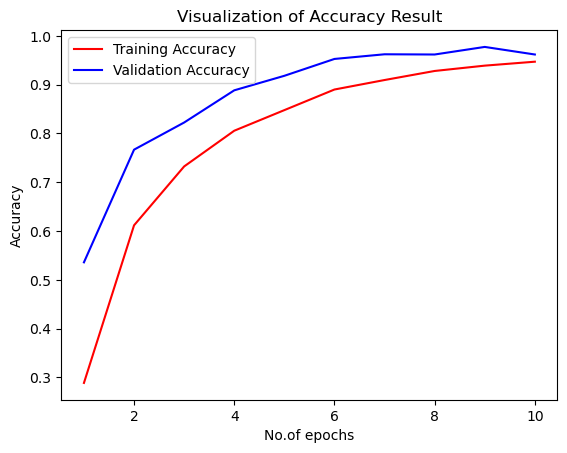

In [34]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No.of epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [35]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 [==============================] - 247s 449ms/step


(array([[9.99985456e-01, 1.69063640e-06, 3.78575338e-10, ...,
         7.82000246e-12, 1.82813313e-11, 2.66090223e-11],
        [9.74848211e-01, 3.34129300e-06, 7.65156738e-09, ...,
         2.78829015e-10, 1.23097296e-11, 6.76516732e-10],
        [1.00000000e+00, 2.99695095e-11, 3.88272619e-14, ...,
         5.88014863e-18, 1.01537295e-13, 5.12896110e-15],
        ...,
        [1.58371276e-05, 1.48142334e-07, 2.57635274e-05, ...,
         1.14617251e-06, 1.51802439e-07, 9.83022094e-01],
        [6.48374727e-04, 7.28230907e-06, 2.69204000e-04, ...,
         1.63478744e-05, 4.04605862e-06, 9.91858661e-01],
        [4.46339286e-08, 8.65415473e-08, 3.00758529e-08, ...,
         2.37207165e-09, 5.66045401e-07, 9.99165535e-01]], dtype=float32),
 (17572, 38))

In [38]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [40]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [41]:
y_true = tf.argmax(true_categories, axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(classification_report(y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.84      0.99      0.91       504
                                 Apple___Black_rot       0.99      0.95      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.87      0.96      0.91       502
                               Blueberry___healthy       0.85      1.00      0.92       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.94      0.96       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.99      0.94      0.97       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.99      0.

In [45]:
cm = confusion_matrix(y_true, predicted_categories)
cm.shape

(38, 38)

## Confusion Matrix Visualization

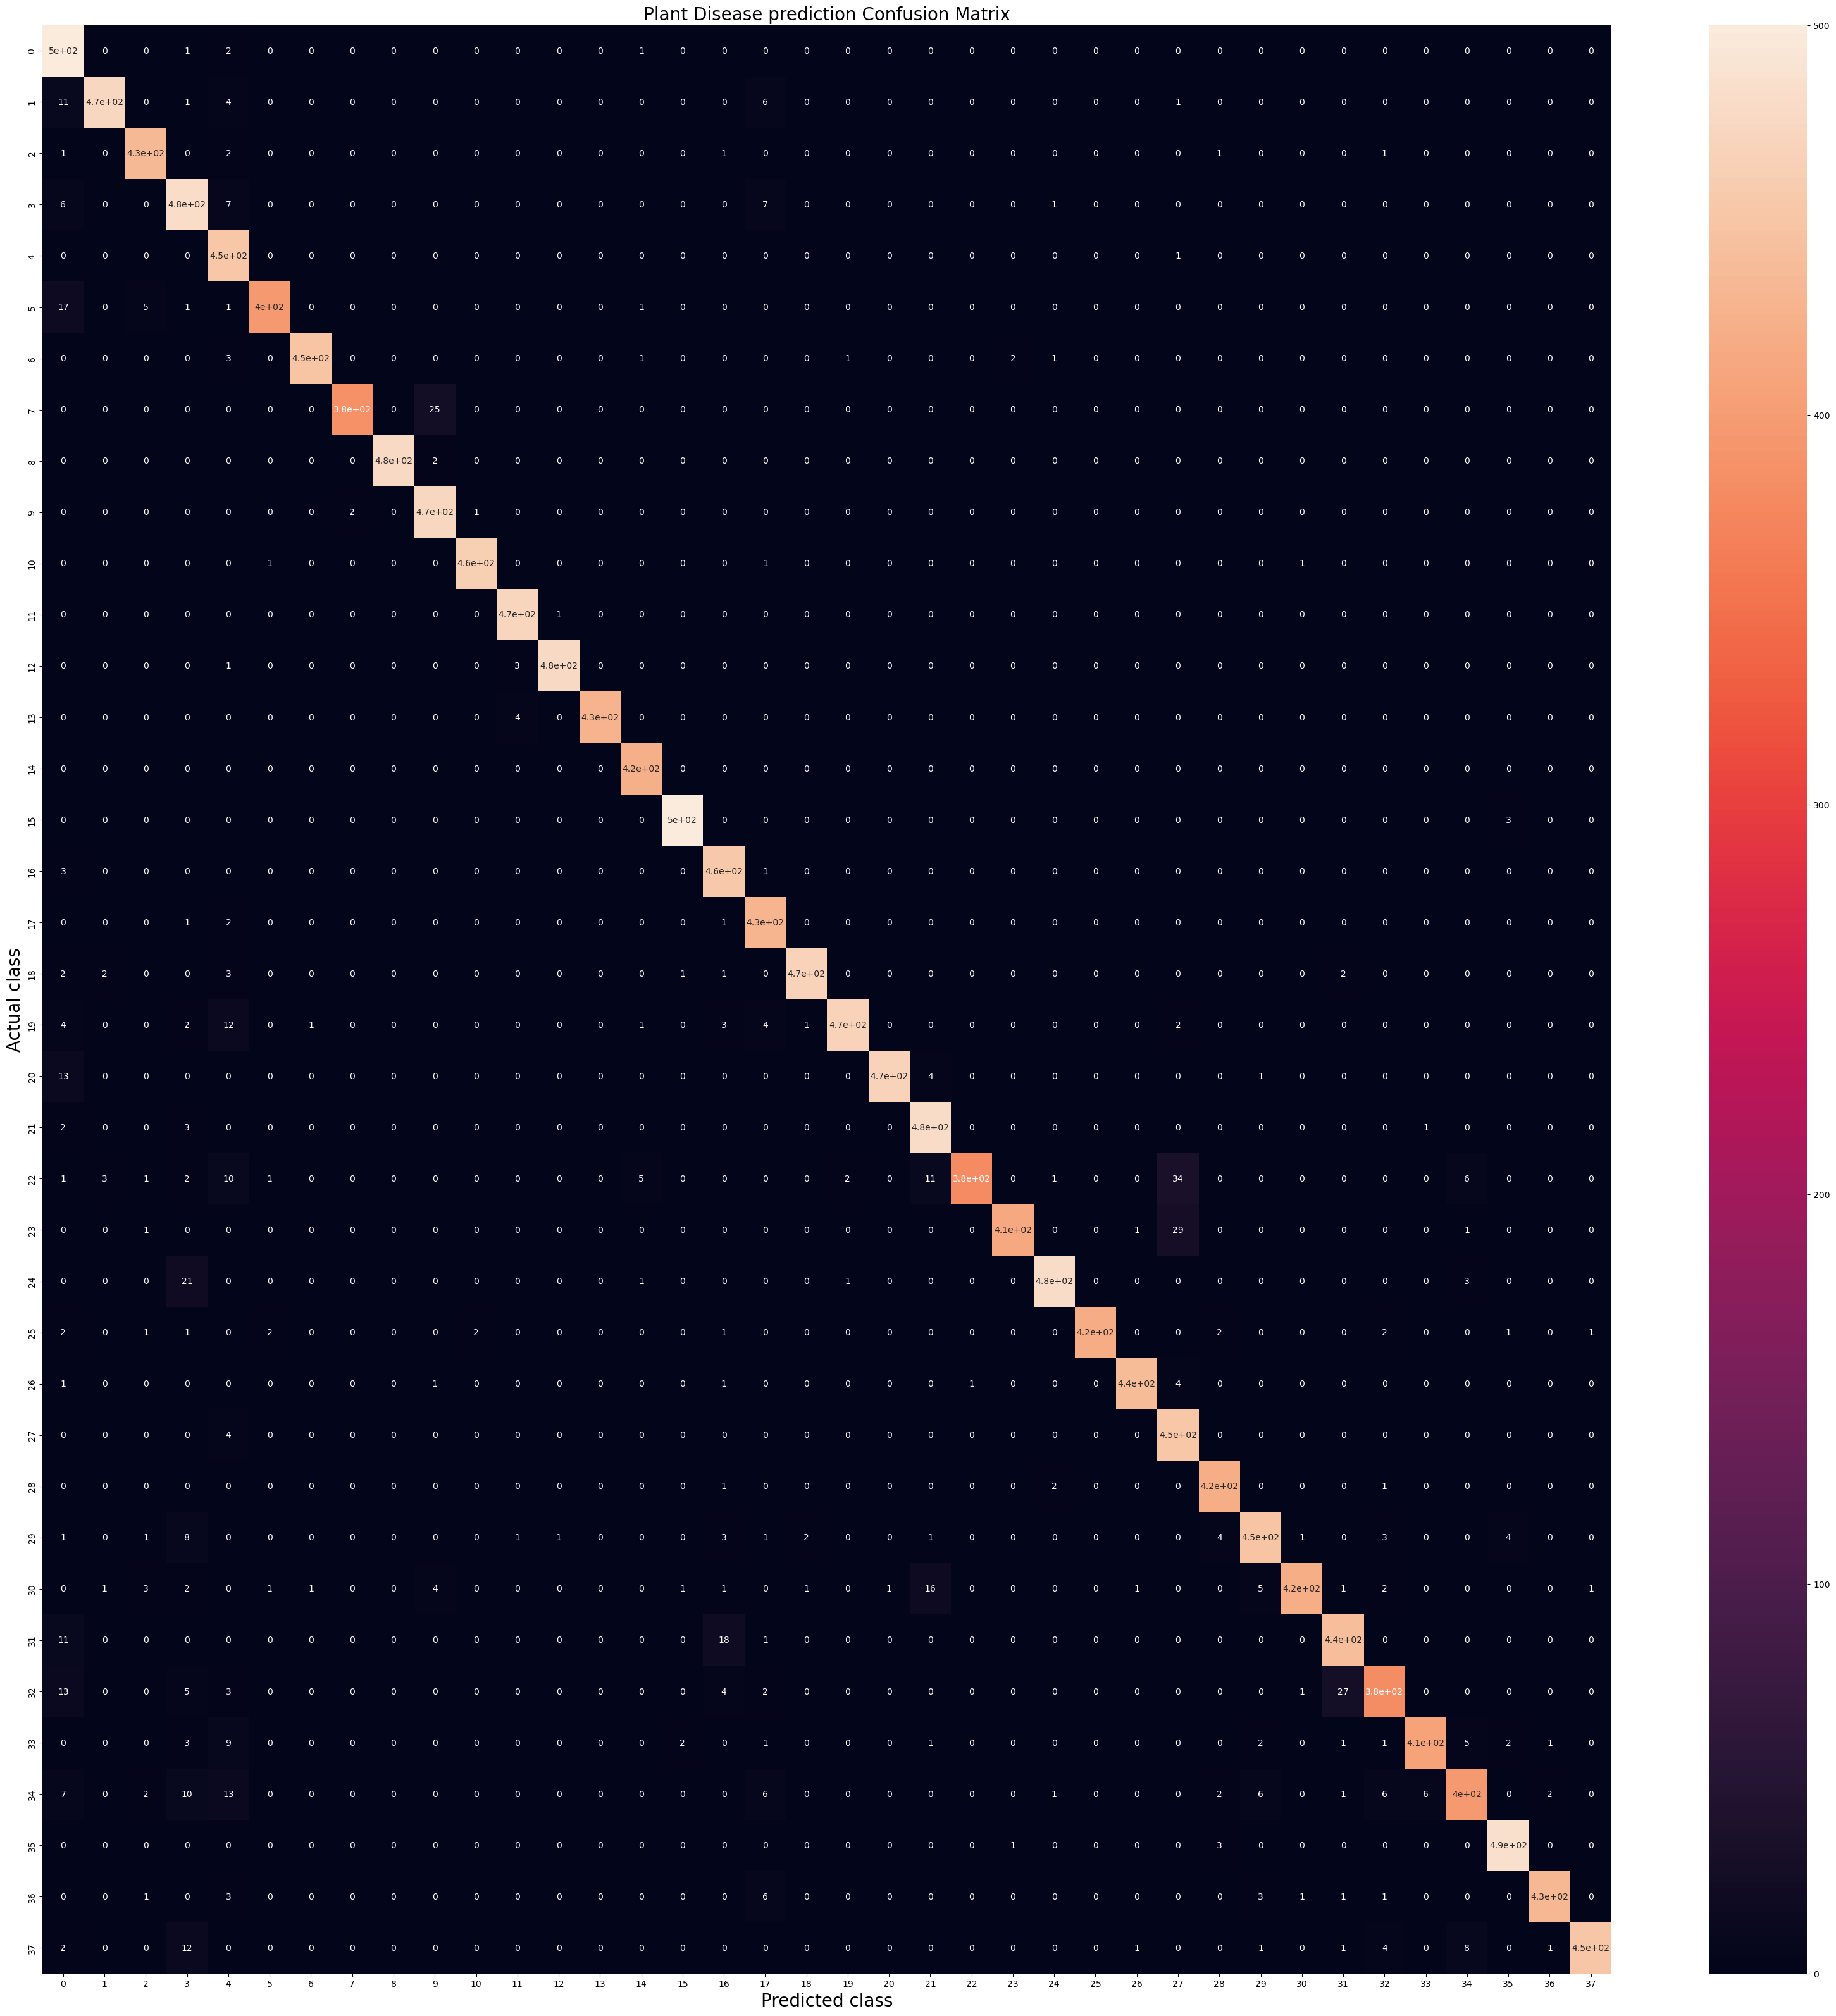

In [47]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel("Predicted class", fontsize=20)
plt.ylabel("Actual class", fontsize=20)
plt.title("Plant Disease prediction Confusion Matrix", fontsize=20)
plt.show()